#### __Project Title:__

Predictive modelling of house prices

#### __Problem Statement:__

Predicting house prices accurately is a significant challenge in the real estate market due to the numerous factors influencing property values. Accurate predictions can greatly benefit buyers, sellers, real estate agents, and financial institutions by providing a reliable estimate of property values. This project would help to develop a robust machine learning model that can predict house prices based on various features of the houses and solve the problem mentioned earlier.

#### __Data Collection:__

The dataset used in this project, "Housing Sales: Factors Influencing Sale Prices" from Kaggle, it is a detailed collection of housing sales data, organized in a CSV (Comma-Separated Values) format. Each row represents a unique property sale, while the columns provide a wealth of information on various property attributes. These attributes include lot size, building type, house style, condition ratings, year of construction, amenities, and sale prices. This dataset is ideal for analyzing real estate market trends, understanding how property characteristics and location influence sale prices, and building predictive models for housing sales.

The dataset can be accessed here: https://www.kaggle.com/datasets/rohit265/housing-sales-factors-influencing-sale-prices

### __IMPORT NECESSARY LIBRARIES__

In [2]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from datetime import datetime

# Importing libraries for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Importing libraries for machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Importing libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Miscellaneous libraries
import warnings
warnings.filterwarnings('ignore')

### __IMPORT DATASET__

In [3]:
# Import the data
df = pd.read_csv("C:\Users\housing.csv")

In [4]:
# View the first five rows in the dataset to confirm what I imported
df.head().T

,0,1,2,3,4
Lot_Frontage,141,80,81,93,74
Lot_Area,31770,11622,14267,11160,13830
Bldg_Type,OneFam,OneFam,OneFam,OneFam,OneFam
House_Style,One_Story,One_Story,One_Story,One_Story,Two_Story
Overall_Cond,Average,Above_Average,Above_Average,Average,Average
Year_Built,1960,1961,1958,1968,1997
Exter_Cond,Typical,Typical,Typical,Typical,Typical
Total_Bsmt_SF,1080,882,1329,2110,928
First_Flr_SF,1656,896,1329,2110,928
Second_Flr_SF,0,0,0,0,701


In [5]:
# Checking the size of the dataset
df.shape

(2413, 18)

### __GENERAL OVERVIEW OF THE DATASET__

#### **Getting a first look at the contents of the dataset**

In [6]:
# Check the first five rows
df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


#### **How large is the dataset that we are working with?**

In [7]:
# Check the size of the dataset
data_size = df.shape

print(f'The training set has {data_size[0]} rows (observations) and {data_size[-1]} columns (features)')

The training set has 2413 rows (observations) and 18 columns (features)


#### **What are the different features contained in our dataset?**

In [8]:
# Check the different features(columns) and their respective descriptions
columns = list(df.columns)
print(columns)

['Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Cond', 'Year_Built', 'Exter_Cond', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


This is a brief description of all the features contained in our dataset:

Lot_Frontage: Linear feet of street connected to the property.

Lot_Area: Lot size in square feet.

Bldg_Type: Type of building (e.g., single-family, multi-family).

House_Style: Style of the house (e.g., ranch, two-story).

Overall_Cond: Overall condition rating of the house.

Year_Built: Year the house was built.

Exter_Cond: Exterior condition rating of the house.

Total_Bsmt_SF: Total square feet of basement area.

First_Flr_SF: First-floor square feet.

Second_Flr_SF: Second-floor square feet.

Full_Bath: Number of full bathrooms.

Half_Bath: Number of half bathrooms.

Bedroom_AbvGr: Number of bedrooms above ground.

Kitchen_AbvGr: Number of kitchens above ground.

Fireplaces: Number of fireplaces.

Longitude: Longitude coordinates of the property location.

Latitude: Latitude coordinates of the property location.

Sale_Price: Sale price of the property. This is also the target feature this project aims to predict

#### **Statistical summary of our data**

In [9]:
# Check the general overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

In [10]:
# Check the statistical summary of the dataset- numerical features only
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Lot_Frontage,2413.0,55.462495,33.542416,0.000000,37.000000,60.000000,77.000000,313.000000
Lot_Area,2413.0,10060.208040,8222.759854,1300.000000,7390.000000,9360.000000,11404.000000,215245.000000
Year_Built,2413.0,1969.436386,29.487943,1872.000000,1953.000000,1971.000000,1998.000000,2010.000000
Total_Bsmt_SF,2413.0,1022.827600,408.977848,0.000000,784.000000,970.000000,1246.000000,3206.000000
First_Flr_SF,2413.0,1133.857024,366.442470,334.000000,866.000000,1060.000000,1350.000000,3820.000000
Second_Flr_SF,2413.0,339.242851,423.198488,0.000000,0.000000,0.000000,704.000000,1872.000000
Full_Bath,2413.0,1.539163,0.544667,0.000000,1.000000,2.000000,2.000000,4.000000
Half_Bath,2413.0,0.377953,0.498467,0.000000,0.000000,0.000000,1.000000,2.000000
Bedroom_AbvGr,2413.0,2.854538,0.813430,0.000000,2.000000,3.000000,3.000000,6.000000
Kitchen_AbvGr,2413.0,1.040199,0.200642,0.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
# Check the statistical summary of the dataset- Categorical features only
df.describe(include= "object").T

,count,unique,top,freq
Bldg_Type,2413,5,OneFam,2002
House_Style,2413,8,One_Story,1189
Overall_Cond,2413,9,Average,1282
Exter_Cond,2413,5,Typical,2081


### **DATA CLEANING**

#### **Correcting typographical errors and inconsistencies**

In [12]:
# View the first 5 rows of our data
df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


In [13]:
# Extract categorical features as a list
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Extract numerical features as a list
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Print the different categories as a list
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']
Numerical features: ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


For the object type features which are 4 in number, I will be inspecting them one after the other to ensure that they are all correctly filled without unnecessary characters and figures.

In [14]:
# Subset the object type features for inspection
object_data_df = df[categorical_features]

# Print the first five rows of the subsetted features
object_data_df.head()

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
0,OneFam,One_Story,Average,Typical
1,OneFam,One_Story,Above_Average,Typical
2,OneFam,One_Story,Above_Average,Typical
3,OneFam,One_Story,Average,Typical
4,OneFam,Two_Story,Average,Typical


In [15]:
# View the unique entries in each feature to take a look at each entry for inspection against misspellings, wrong characters and typographical errors

# Loop through each feature (column) in the DataFrame containing object (categorical) data
for feature in object_data_df.columns:
    
    # Get the unique entries for the current feature
    unique_entries = object_data_df[feature].unique()
    
    # Print out the feature name and its unique entries as a list
    print(f'The unique entries in {feature} are {unique_entries}')

The unique entries in Bldg_Type are ['OneFam' 'TwnhsE' 'Twnhs' 'Duplex' 'TwoFmCon']
The unique entries in House_Style are ['One_Story' 'Two_Story' 'One_and_Half_Fin' 'SLvl' 'SFoyer'
 'Two_and_Half_Unf' 'One_and_Half_Unf' 'Two_and_Half_Fin']
The unique entries in Overall_Cond are ['Average' 'Above_Average' 'Good' 'Very_Good' 'Poor' 'Below_Average'
 'Excellent' 'Fair' 'Very_Poor']
The unique entries in Exter_Cond are ['Typical' 'Good' 'Fair' 'Poor' 'Excellent']


In [16]:
# Subset the numerical type features for inspection
numerical_data_df = df[numerical_features]

# Print the first five rows of the subset
numerical_data_df.head()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,1960,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,1961,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,1958,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,1968,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,1997,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


In [17]:
# View the unique entries in each feature to take a look at each numerical entry for inspection against entry errors

# Loop through each feature (column) in the DataFrame containing object (categorical) data
for feature in numerical_data_df.columns:
    
    # Get the unique entries for the current feature
    unique_entries = numerical_data_df[feature].unique()
    
    # Print out the feature name and its unique entries as a list
    print(f'The unique entries in {feature} are {unique_entries}')

The unique entries in Lot_Frontage are [141  80  81  93  74  78  41  43  39  60  75   0  63  85  47 152 140 105
  65  70  26  21  53  24  98  90  79 110  61  36 100  67 108  59  92  58
  56  73  72  84  76  50  55  68  88 107  25  30  40  77 120 137  87 119
  64  96  71  69  52  51  57  54  86  94 124  83  82  38  44  48  66  45
  35 129  89  31  42  28  99  95  97 102 103  34 117 149 122  62 174 106
 112  32 128  91 121 144 130 109 150 113 125 101  46 104 135 136  37  22
 313  49 115 123 195  33 118 116 138 114 155 126 200 131 153 134]
The unique entries in Lot_Area are [31770 11622 14267 ...  7937  8885 10441]
The unique entries in Year_Built are [1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 1993 1990 1985 2003
 1988 1951 1978 1977 2000 1970 1971 1975 2007 2005 2004 2002 2006 1996
 1994 2009 2008 1980 1979 1984 1920 1965 1967 1963 1962 1976 1972 1966
 1959 1964 1950 1952 1949 1940 1954 1955 1957 1956 1948 1910 1927 1915
 1945 1929 1938 1928 1890 1885 1922 1925 1942 1936 1930 192

From the data description above for the various object type features in the dataset, I carefully studied the description of the data on Kaggle and fortunately, everything is in order. There is no need to strip, split of even adjust any of the entries.

#### **Ensure consistent formats (dates, time, units, labels)**

This section will be taking a look at the entries for each feature to ensure that they are entered in using the right metrics and units, especially date and time features, they mostly come as object or integer data types sometimes so there is usually a need to convert their data types and also ensure they are entered in the right format. For the units and lables, I will be using the data description file for inspection.

In [18]:
# Inspecting Year Built- the only feature that has to do with time
df[['Year_Built']]

,Year_Built
0,1960
1,1961
2,1958
3,1968
4,1997
...,...
2408,1984
2409,1983
2410,1992
2411,1974


As we can see from the above, the only date time feature (Year Built) is an integer type. Now I understand that it might not really be necessary to convert it depending on the kind of analysis that needs to be carried out and I won't be converting this feature to datetime because of the following:

1. The conversion is not going to be effective as pandas will only convert them to 1st of January of each and we don't have further details to ensure this does not happen

2. To determine the age of each of the houses if the need arises, I can easily use a loop to subtract each year from 2024 and then append them to the dataset

Lastly, the data description file was studied as well for each of our features and they are all consistent when it comes to labels, units of measurements and standards

#### **Addressing Data Quality Issues**

Addressing data quality issues such as handling of missing values, duplicate records and outliers

In [19]:
# Identify and handle missing data.
df.isna().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

From the above result, we can see that there are no more missig values in the dataset.

In [20]:
# Handling duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate entries in the dataset as well

In [21]:
# Handling outliers

# Recall the numerical features we created earlier
numerical_features

# Recall the numerical df we created earlier
numerical_data_df

# Recall the categorical features we created earlier
categorical_features

# Recall the numerical df we created earlier
object_data_df

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
0,OneFam,One_Story,Average,Typical
1,OneFam,One_Story,Above_Average,Typical
2,OneFam,One_Story,Above_Average,Typical
3,OneFam,One_Story,Average,Typical
4,OneFam,Two_Story,Average,Typical
...,...,...,...,...
2408,OneFam,SLvl,Above_Average,Typical
2409,OneFam,One_Story,Average,Typical
2410,OneFam,SFoyer,Average,Typical
2411,OneFam,One_Story,Average,Typical


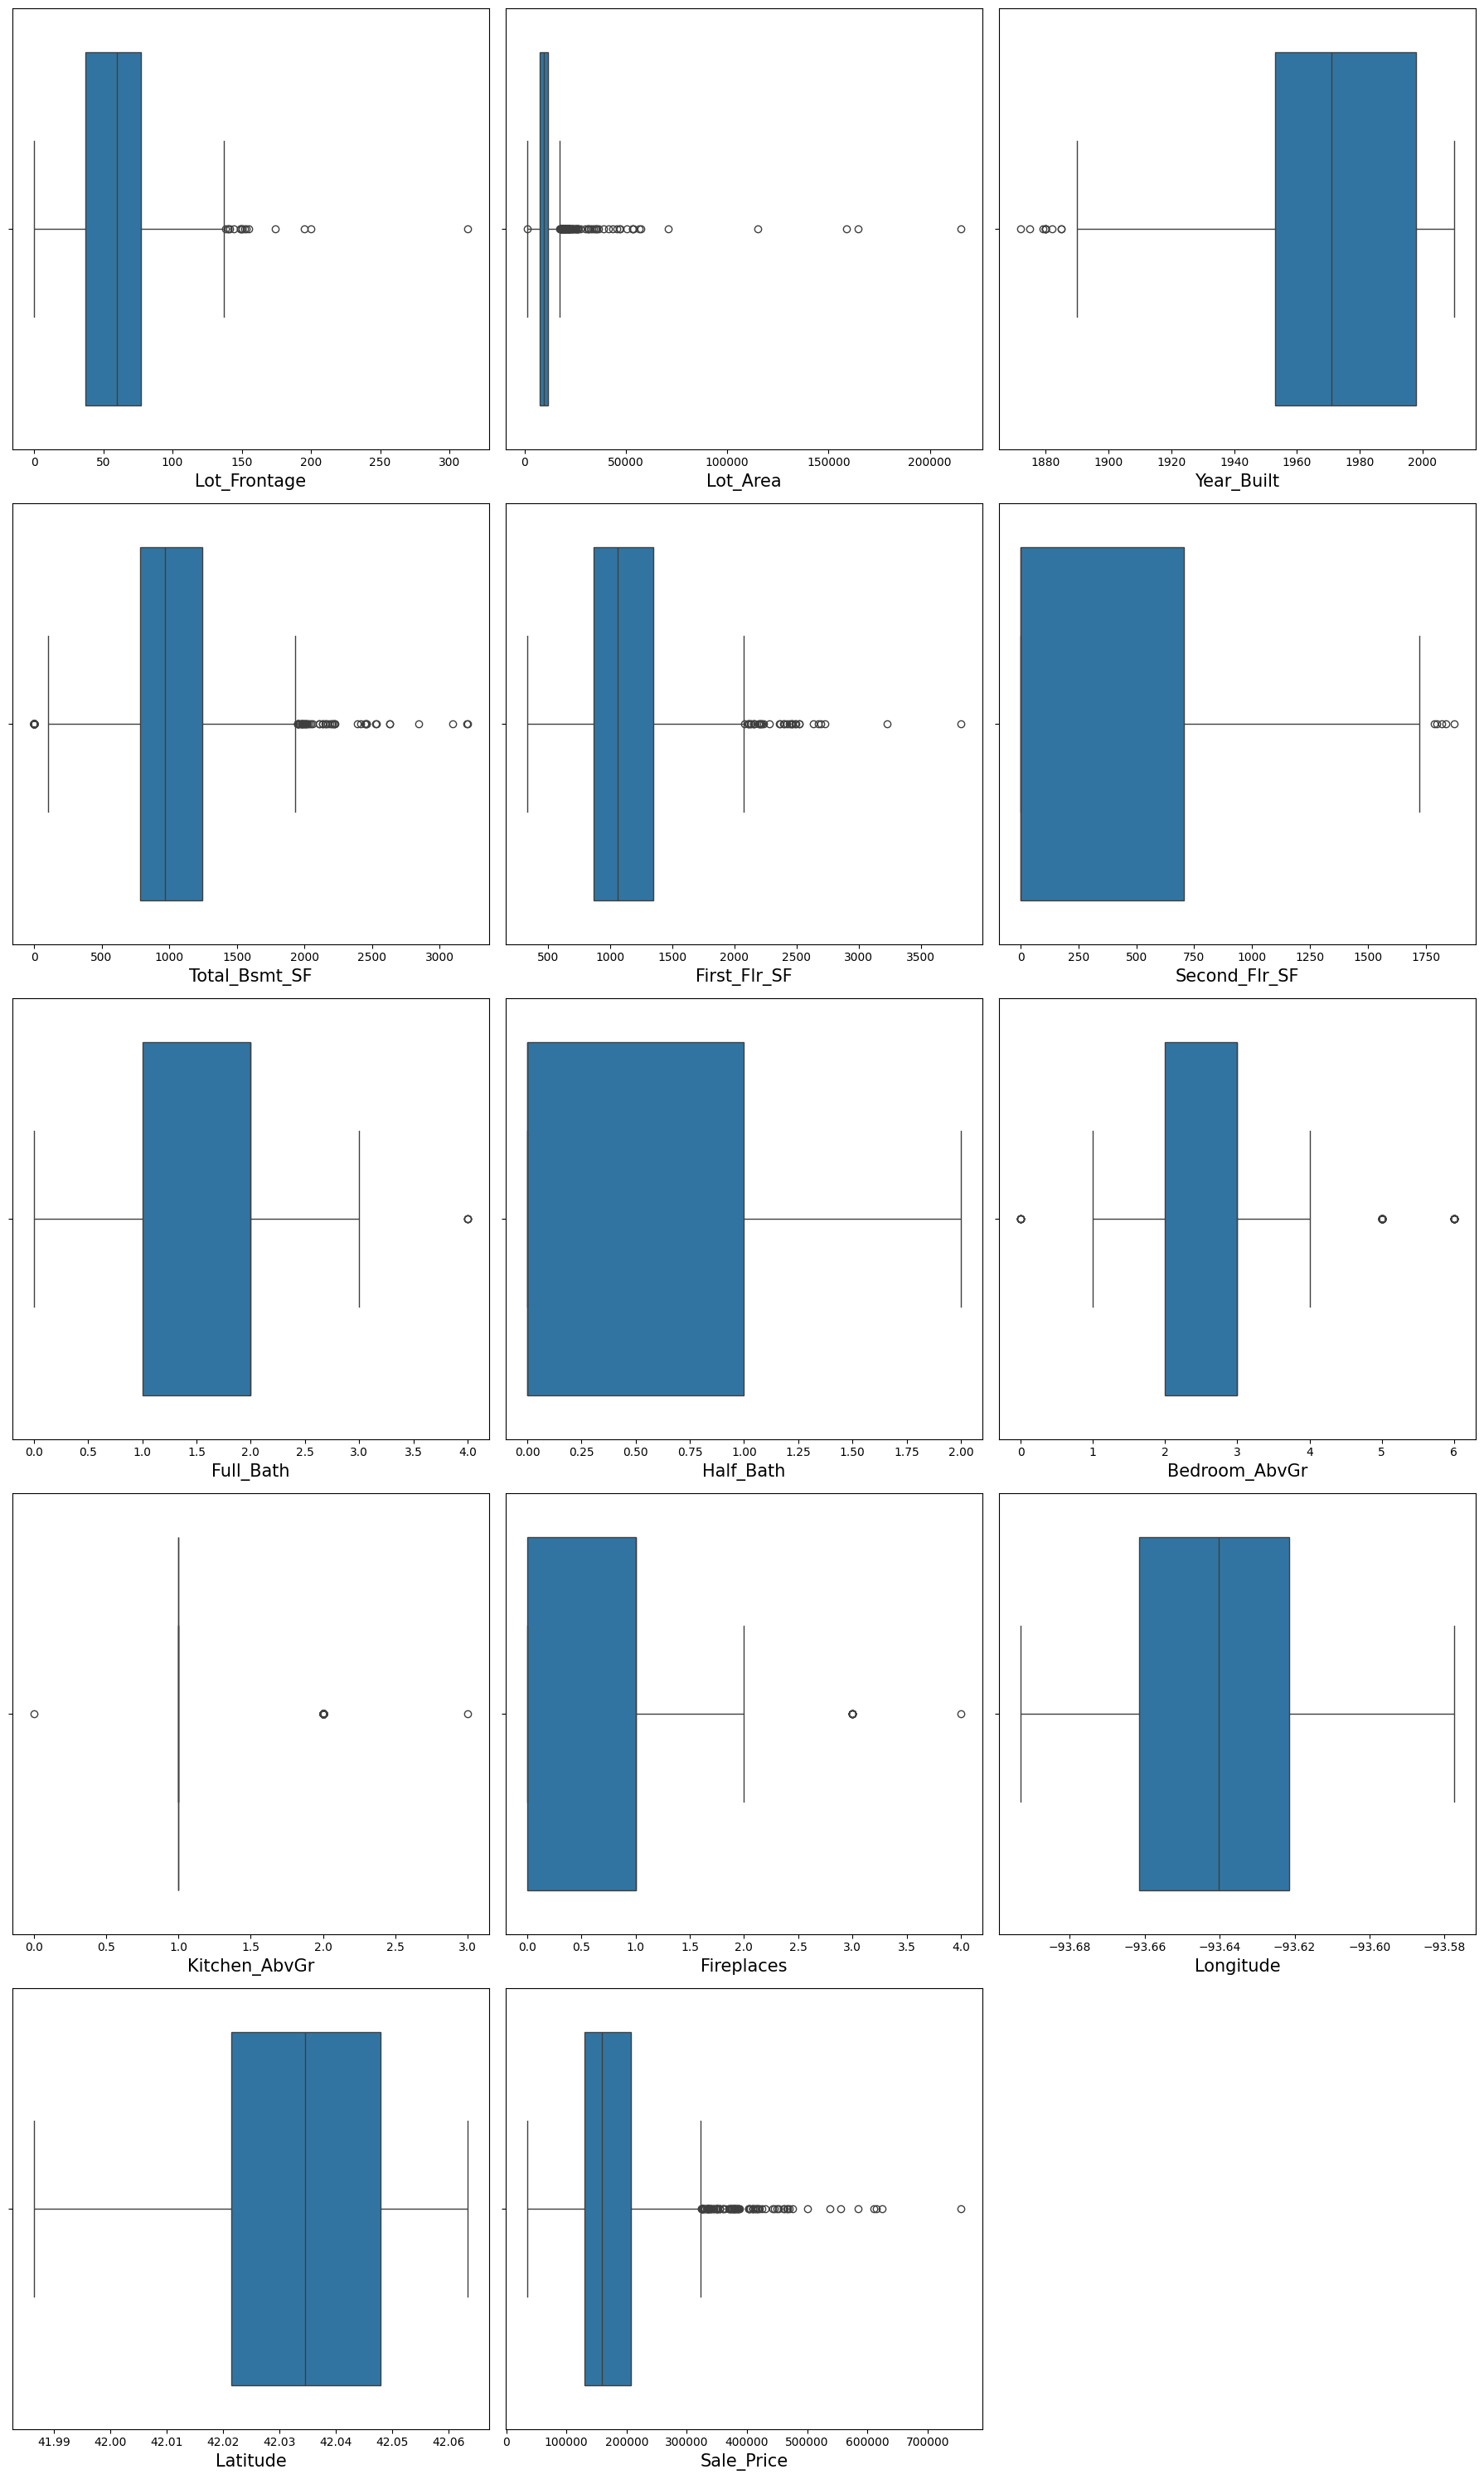

In [22]:
# Plotting the distribution of outliers using a box plot for each numerical feature 

# Number of columns in the DataFrame
num_features = len(numerical_data_df.columns)

# Calculate the number of rows and columns needed for the subplot grid
n_cols = 3
n_rows = np.ceil(num_features / n_cols).astype(int)

# Set the size of the entire figure
plt.figure(figsize=(18, 6 * n_rows))

# Iterate over each column in the DataFrame containing numerical data
for index, column in enumerate(numerical_data_df.columns):
    
    # Create a subplot in the calculated grid
    plt.subplot(n_rows, n_cols, index + 1)
    
    # Generate a boxplot for the current column
    sns.boxplot(x=numerical_data_df[column])
    
    # Set the label for the x-axis with the column name and adjust the font size
    plt.xlabel(column, fontsize=15)

# Adjust layout to prevent overlap
plt.tight_layout()

In [23]:
# Create a function for detecting outliers

def identify_outliers(data, column_name):
    """
    Identify outliers in a given column using the Interquartile Range (IQR) method.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: The name of the column to check for outliers.

    Returns:
    - A DataFrame containing rows where values in the specified column are considered outliers.
    """
    
    # Calculate the first quartile (25th percentile) and the third quartile (75th percentile)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify and return the outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    
    return outliers

In [24]:
# Apply the function to the list of numerical features created earlier so as to extract outliers and then append them to a dataframe

# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

# Apply the outlier detection function to each numerical feature
for feature in numerical_features:
    # Get outliers for the current feature
    feature_outliers = identify_outliers(df, feature)
    
    # Add a column to indicate the feature name
    feature_outliers['feature'] = feature
    
    # Append the outliers to the combined DataFrame
    outliers_df = pd.concat([outliers_df, feature_outliers])

# Size of the outliers in the dataset
outliers_df.shape

(561, 19)

In [25]:
# Print the DataFrame of outliers
outliers_df

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price,feature
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000,Lot_Frontage
16,152,12134,OneFam,One_and_Half_Fin,Good,1988,Typical,559,1080,672,2,0,4,1,0,-93.623595,42.060351,164000,Lot_Frontage
17,140,19138,OneFam,One_Story,Average,1951,Typical,864,864,0,1,0,2,1,0,-93.622971,42.056673,141000,Lot_Frontage
405,149,12589,OneFam,Two_Story,Average,2005,Typical,742,742,742,2,1,3,1,1,-93.644457,42.062058,174000,Lot_Frontage
434,174,15138,OneFam,Two_Story,Average,1995,Typical,1462,1490,1304,2,1,4,1,1,-93.657163,42.053911,403000,Lot_Frontage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,105,11025,OneFam,Two_Story,Average,1992,Typical,1334,1520,1306,2,1,3,1,3,-93.653512,42.048608,334000,Sale_Price
2093,68,50271,OneFam,One_Story,Average,1981,Typical,1842,1842,0,0,1,0,1,1,-93.658237,42.037409,385000,Sale_Price
2215,90,22950,OneFam,Two_and_Half_Fin,Excellent,1892,Good,1107,1518,1518,2,1,4,1,2,-93.610438,42.029025,475000,Sale_Price
2272,60,19800,OneFam,Two_and_Half_Unf,Very_Good,1935,Typical,1836,1836,1836,3,1,5,1,2,-93.660664,42.028191,415000,Sale_Price


It is extremely important to note at this point that outliers can be handled before of after exploratory data analysis (EDA) but in this case, I will be reviewing the relationship between the target feature and the outliers to see their effects before I decide what to do with the outliers.

In [26]:
# Create a feature to identify outliers in the main DataFrame (df)
df['IsOutlier'] = df['Sale_Price'].isin(outliers_df['Sale_Price'])

# Perform ANOVA to compare Sale Price between outliers and non-outliers
f_stat, p_value = f_oneway(
    df[df['IsOutlier']]['Sale_Price'],  # Sale_Price for outliers
    df[~df['IsOutlier']]['Sale_Price']  # Sale_Price for non-outliers
)

# Print the ANOVA results
print(f"ANOVA F-statistic: {f_stat:.4f}, P-value: {p_value:.4e}")

ANOVA F-statistic: 17.5570, P-value: 2.8887e-05


The F-statistic of 17.5570 indicates a significant difference in `Sale_Price` between outliers and non-outliers. The p-value of 2.8887e-05 confirms this difference is statistically significant. The two figures suggest that outliers will impact `Sale_Price` differently than non-outliers and may affect model performance.

I would have loved to drop them and just move on but what I will do is that I will make a copy of my dataset and carry out prediction on the two, then compare metrics to see which one performs better.

#### Make a copy of the dataset thereby making df the dataset with outliers and df2 the dataset without outliers

In [27]:
df2_without_outliers = df.copy()

In [28]:
# Create an empty DataFrame to store outliers
outliers_df2 = pd.DataFrame()

# Apply the outlier detection function to each numerical feature
for feature in numerical_features:
    # Get outliers for the current feature
    feature_outliers = identify_outliers(df2_without_outliers, feature)
    
    # Ensure there are outliers to append
    if not feature_outliers.empty:
        # Optionally, add the feature name for reference
        feature_outliers = feature_outliers.drop(columns=['feature'], errors='ignore')  # Remove 'feature' column if it exists
        
        # Append the outliers to the combined DataFrame
        outliers_df2 = pd.concat([outliers_df2, feature_outliers], ignore_index=True)  # Use 'outliers_df2' here

# Size of the outliers in the dataset
print(outliers_df2.shape)  # Print the shape of 'outliers_df2'

(561, 19)


In [29]:
# Drop the outliers
index = set(outliers_df2.index)

# dropping all the outliers
df2_without_outliers.drop(index, inplace=True, axis=0)

# Check the shape of the data left
df2_without_outliers.shape

(1852, 19)

I will be proceeding to carry out EDA on my dataset (df) with outliers to better understand the data, the only time I will be bringing df2(without outliers) into the picture again would be during the machine learning phase

### __SPLIT THE DATASET INTO TRAINING TEST DATASET__

Before I dive into really exploring my data, its important to split into train and test datasets for the following reasons:

1. Prevents data leakage: By splitting before EDA, training set is isolated from the test set, preventing any information transfer.

   
2. Mimics real-world scenario: this will stimulate the model to perform on unseen data

In [30]:
# Set the random seed for reproducibility
random_seed = 42

# Define the fraction of data to be used for the training set
train_fraction = 0.8

# Sample the training data
train_df = df.sample(frac=train_fraction, random_state=random_seed)

# Get the test data by dropping the training indices
test_df = df.drop(train_df.index)

In [31]:
# View the training set
train_df.head().T

,765,2387,2162,1833,1814
Lot_Frontage,85,54,60,79,120
Lot_Area,10200,13811,10800,9245,10356
Bldg_Type,OneFam,OneFam,OneFam,OneFam,OneFam
House_Style,One_Story,One_Story,One_and_Half_Fin,Two_Story,One_Story
Overall_Cond,Average,Above_Average,Very_Good,Average,Above_Average
Year_Built,2007,1987,1936,2006,1975
Exter_Cond,Typical,Typical,Typical,Typical,Typical
Total_Bsmt_SF,1578,1112,796,939,969
First_Flr_SF,1602,1137,1096,939,969
Second_Flr_SF,0,0,370,858,0


In [32]:
# Size of the training set
train_df.shape

(1930, 19)

In [33]:
# View the test set
test_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price,IsOutlier
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000,True
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900,False
11,0,7980,OneFam,One_Story,Good,1992,Good,1168,1187,0,2,0,3,1,0,-93.635951,42.057419,185000,True
16,152,12134,OneFam,One_and_Half_Fin,Good,1988,Typical,559,1080,672,2,0,4,1,0,-93.623595,42.060351,164000,True
19,105,11751,OneFam,One_Story,Above_Average,1977,Typical,1844,1844,0,2,0,3,1,1,-93.633962,42.050346,190000,True


In [34]:
# Size of the test set
test_df.shape

(483, 19)

### __EXPLORATORY DATA ANALYSIS__

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.

The dataset has been split into training and test datasets but we will focus on the training dataset for EDA for the following reasons:

1. **Understanding Patterns**: The training dataset is what will be used to train the models of choice, so understanding its patterns, distributions, and relationships is crucial.

2. **Avoiding Data Leakage**: Performing EDA on the test set can lead to data leakage, where information from the test set influences the model training process, resulting in overly optimistic performance estimates.

3. **Model Validation**: The test set will be kept unseen until final model evaluation to provide an unbiased estimate of the model's performance.

The EDA will be carried out as follows to have a comprehensive overview of our dataset:
    
1. Non-Graphical Univariate Analysis
2. Graphical Univariate Analysis
3. Non-Graphical Multivariate Analysis
4. Graphical Multivariate Analysis

#### __Non-Graphical Univariate Analysis__

This section examines each of the features using figures and metrics without plotting graphs or use of any visualisation techniques.

In [35]:
# Frequency distribution for categorical features

# Iterate over each categorical feature in the list
for feature in categorical_features:
    
    # Print the frequency distribution of the feature
    print(f"Frequency distribution for {feature}:\n{train_df[feature].value_counts()}\n")
    
    # Print the proportions (relative frequencies) of each unique value in the feature
    print(f"Proportions for {feature}:\n{train_df[feature].value_counts(normalize=True)}\n")
    
    # Print the unique values present in the feature
    print(f"Unique values for {feature}: {train_df[feature].unique()}\n")


Frequency distribution for Bldg_Type:
Bldg_Type
OneFam      1585
TwnhsE       155
Twnhs         85
Duplex        64
TwoFmCon      41
Name: count, dtype: int64

Proportions for Bldg_Type:
Bldg_Type
OneFam      0.821244
TwnhsE      0.080311
Twnhs       0.044041
Duplex      0.033161
TwoFmCon    0.021244
Name: proportion, dtype: float64

Unique values for Bldg_Type: ['OneFam' 'Twnhs' 'Duplex' 'TwnhsE' 'TwoFmCon']

Frequency distribution for House_Style:
House_Style
One_Story           958
Two_Story           576
One_and_Half_Fin    209
SLvl                 95
SFoyer               54
Two_and_Half_Unf     20
One_and_Half_Unf     14
Two_and_Half_Fin      4
Name: count, dtype: int64

Proportions for House_Style:
House_Style
One_Story           0.496373
Two_Story           0.298446
One_and_Half_Fin    0.108290
SLvl                0.049223
SFoyer              0.027979
Two_and_Half_Unf    0.010363
One_and_Half_Unf    0.007254
Two_and_Half_Fin    0.002073
Name: proportion, dtype: float64

Unique v

In [36]:
# Descriptive statistics for numerical features
print(train_df[numerical_features].describe())

       Lot_Frontage       Lot_Area   Year_Built  Total_Bsmt_SF  First_Flr_SF  \
count   1930.000000    1930.000000  1930.000000    1930.000000   1930.000000   
mean      54.965285   10050.706218  1970.115026    1027.575648   1137.199482   
std       33.821358    8519.529871    29.108567     414.946084    374.324302   
min        0.000000    1470.000000  1872.000000       0.000000    334.000000   
25%       35.000000    7250.500000  1954.000000     784.000000    867.250000   
50%       60.000000    9362.000000  1972.000000     972.000000   1057.000000   
75%       76.000000   11424.500000  1998.000000    1251.750000   1352.250000   
max      313.000000  215245.000000  2010.000000    3206.000000   3820.000000   

       Second_Flr_SF    Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
count    1930.000000  1930.000000  1930.000000    1930.000000    1930.000000   
mean      335.330570     1.545596     0.376684       2.855959       1.039896   
std       423.726725     0.543822     0

In [37]:
# Checking for the distribution of our data

# Loop through each numerical feature in the list
for feature in numerical_features:
    
    # Calculate and print the skewness and kurtosis of the feature
    print(f"{feature} - Skewness: {train_df[feature].skew()}, Kurtosis: {train_df[feature].kurt()}\n")
    
    # Print the number of unique values present in the feature
    print(f"Unique values in {feature}: {train_df[feature].nunique()}\n")


Lot_Frontage - Skewness: -0.010874332548850906, Kurtosis: 1.4370117786433587

Unique values in Lot_Frontage: 116

Lot_Area - Skewness: 13.83340939856872, Kurtosis: 280.32867858348845

Unique values in Lot_Area: 1372

Year_Built - Skewness: -0.6174218718801794, Kurtosis: -0.33170204205987774

Unique values in Year_Built: 113

Total_Bsmt_SF - Skewness: 0.5208304471630972, Kurtosis: 1.8843798843632324

Unique values in Total_Bsmt_SF: 836

First_Flr_SF - Skewness: 1.1128277150650936, Kurtosis: 2.5608337141689184

Unique values in First_Flr_SF: 883

Second_Flr_SF - Skewness: 0.8506260894238284, Kurtosis: -0.4199882517033391

Unique values in Second_Flr_SF: 483

Full_Bath - Skewness: 0.22515784190196753, Kurtosis: -0.4672760136690086

Unique values in Full_Bath: 5

Half_Bath - Skewness: 0.6722933664480161, Kurtosis: -1.1456445950898546

Unique values in Half_Bath: 3

Bedroom_AbvGr - Skewness: 0.1886285063162228, Kurtosis: 1.5722853489035389

Unique values in Bedroom_AbvGr: 7

Kitchen_AbvGr -

#### __Graphical Univariate Analysis__

Histograms: Show distributions of continuous features.

Box Plots: Reveal the spread and outliers of continuous features.

Bar Plots: Display the frequency distribution of categorical features.

In [42]:
categorical_features

['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']

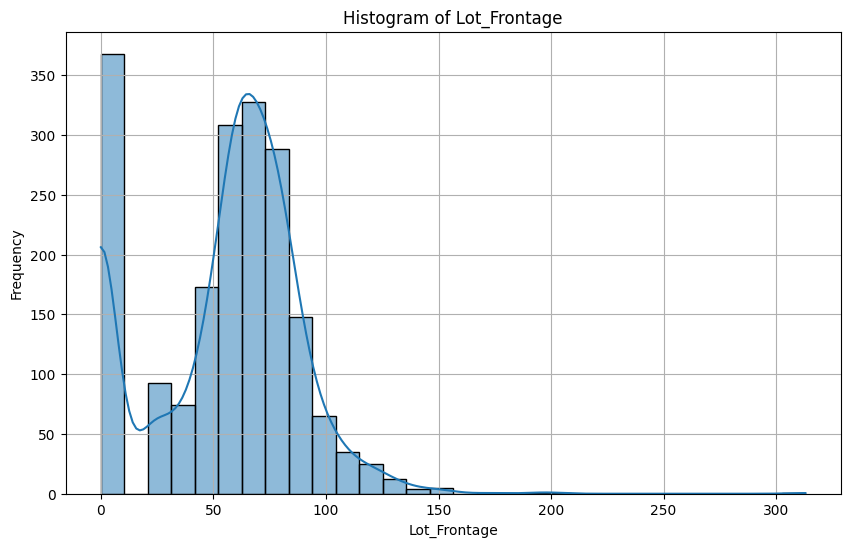

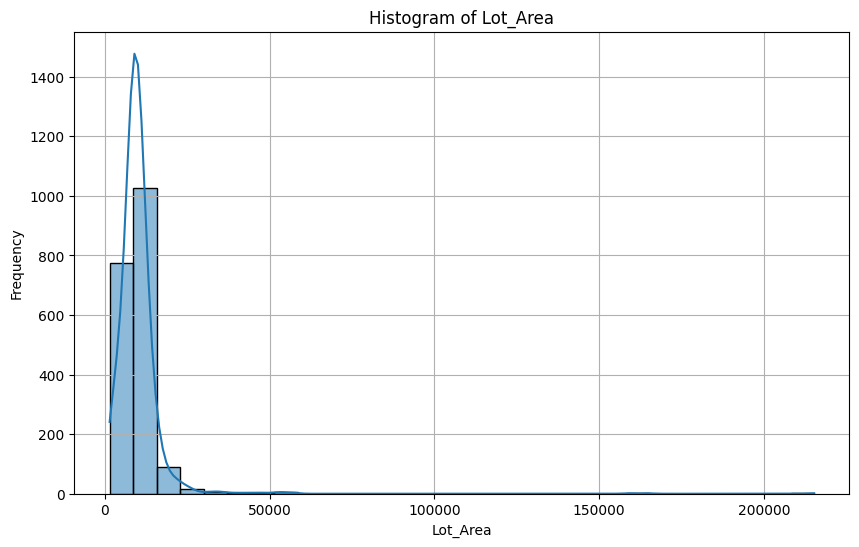

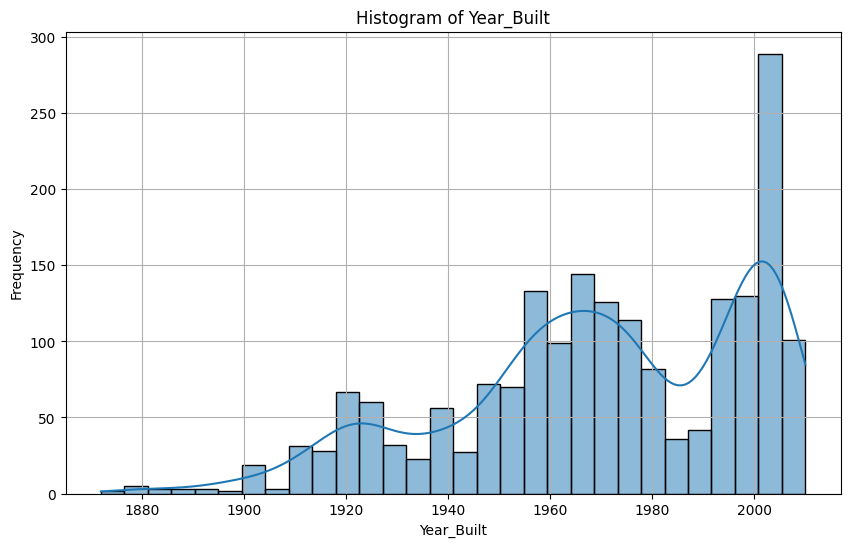

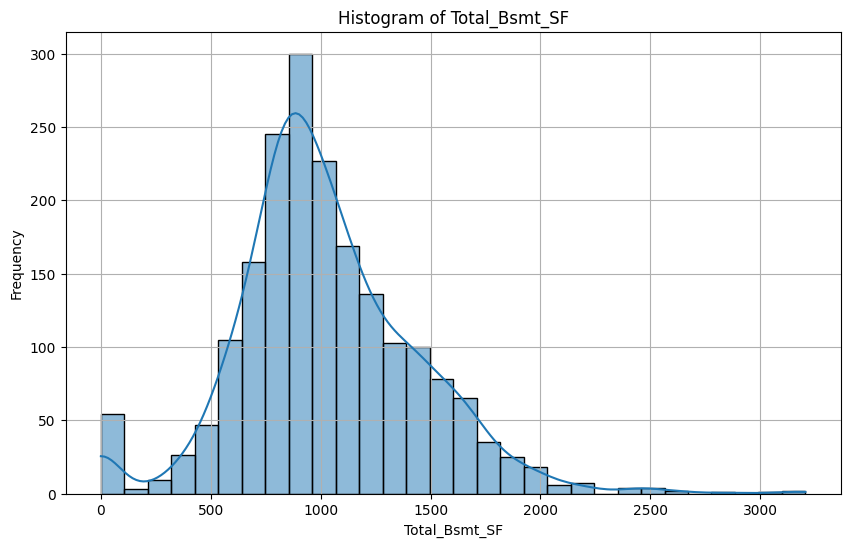

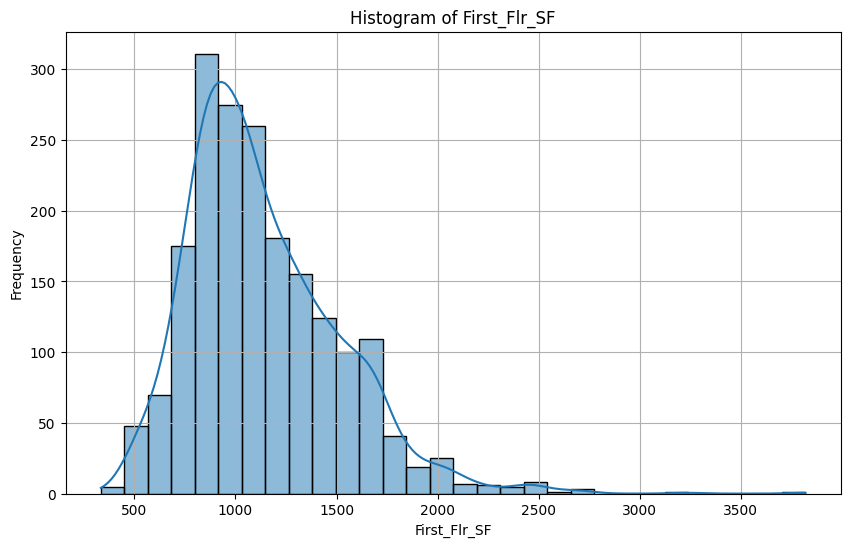

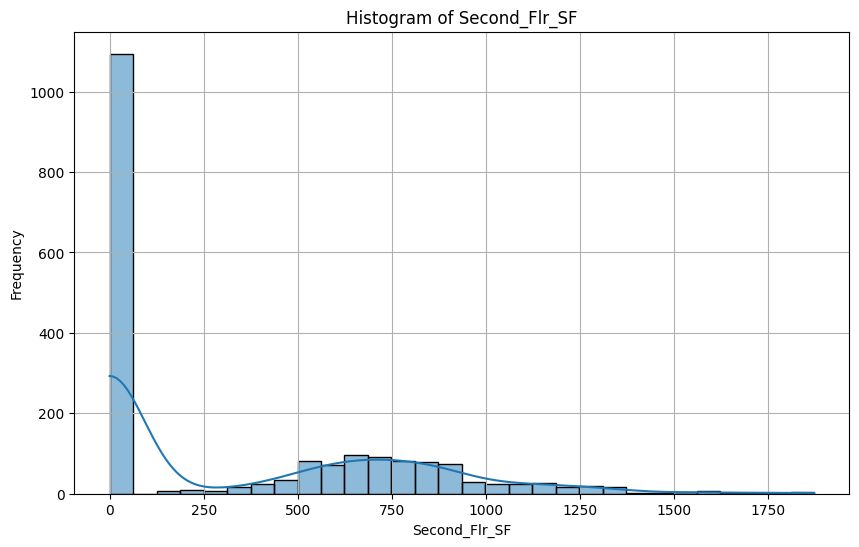

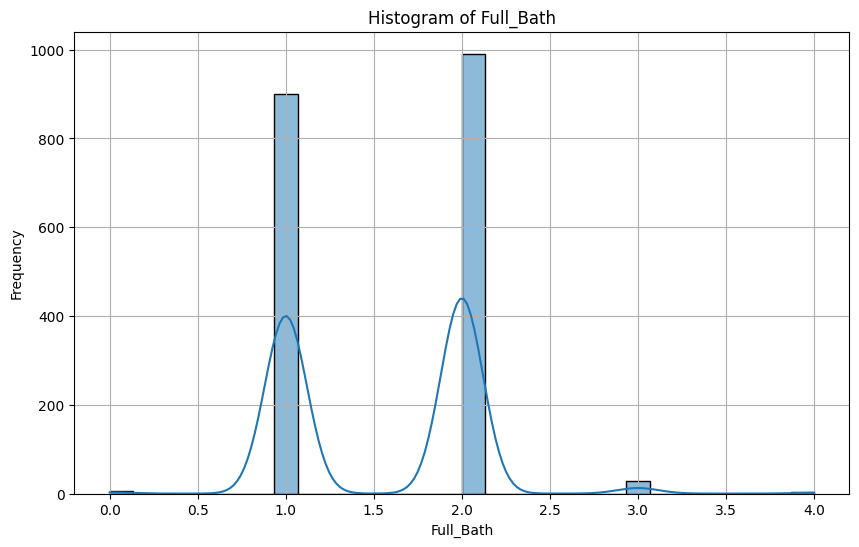

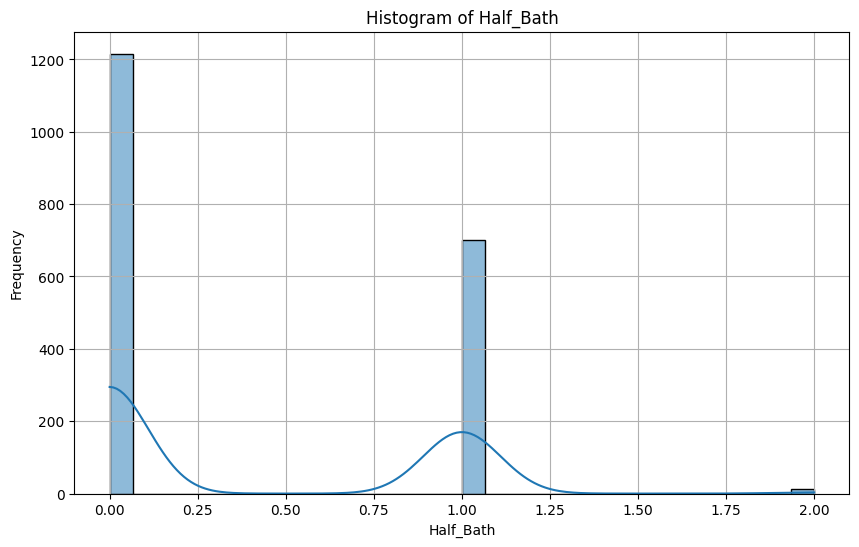

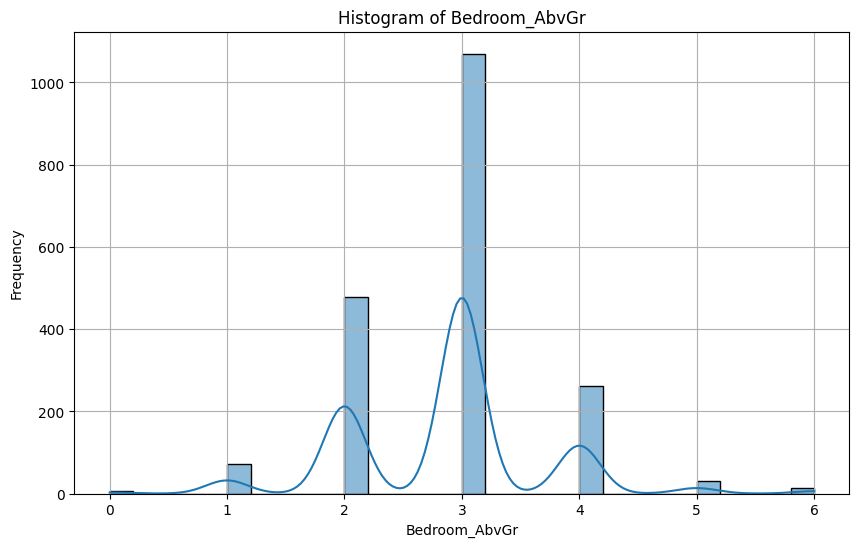

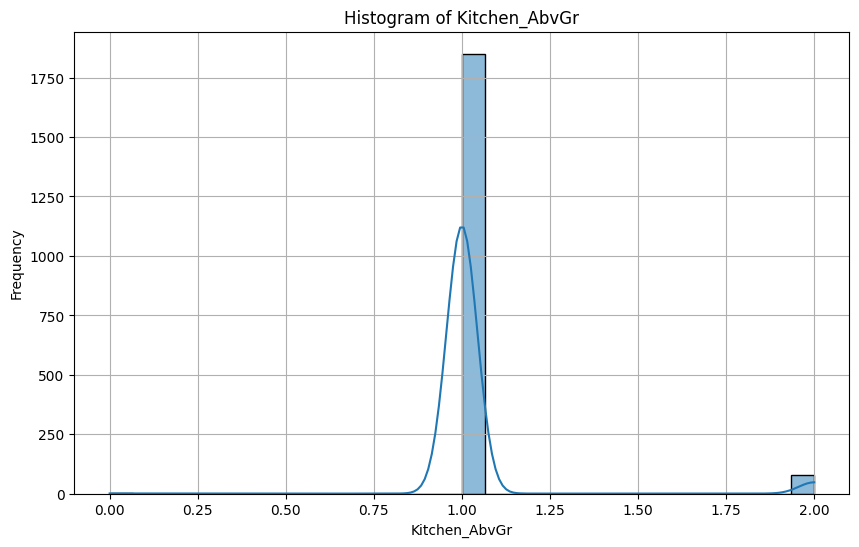

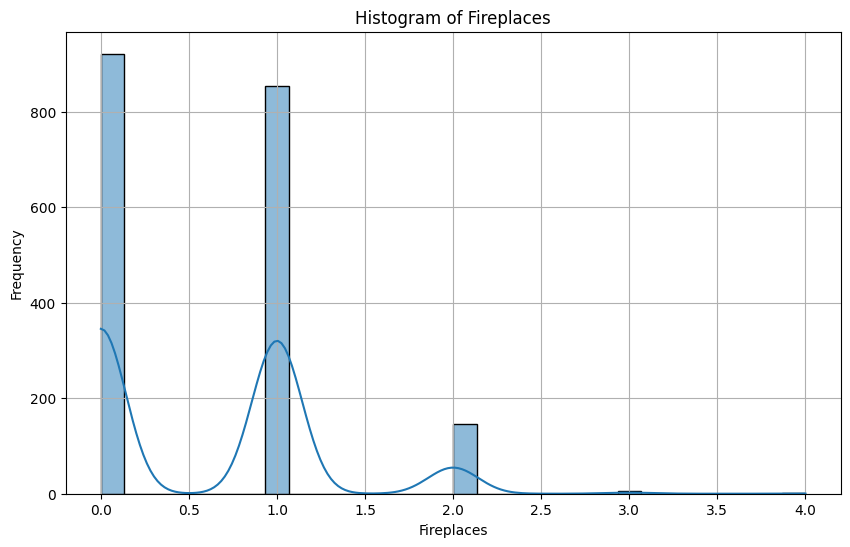

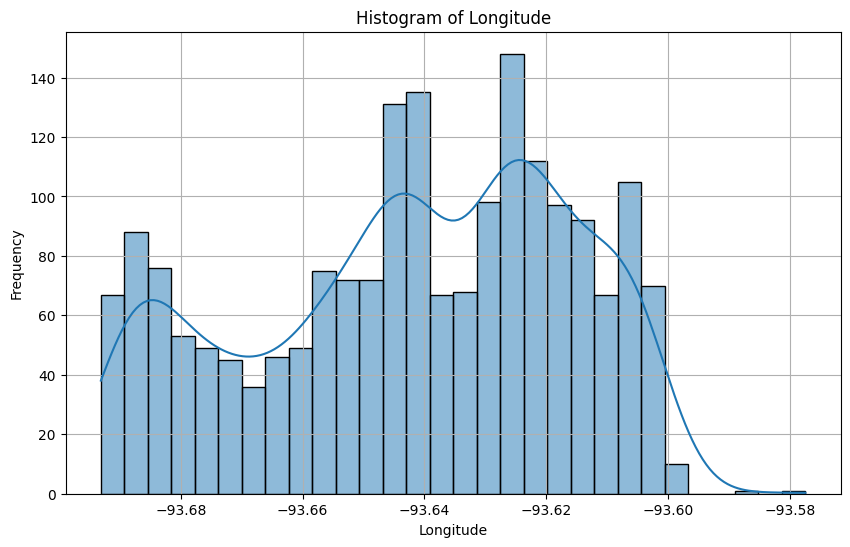

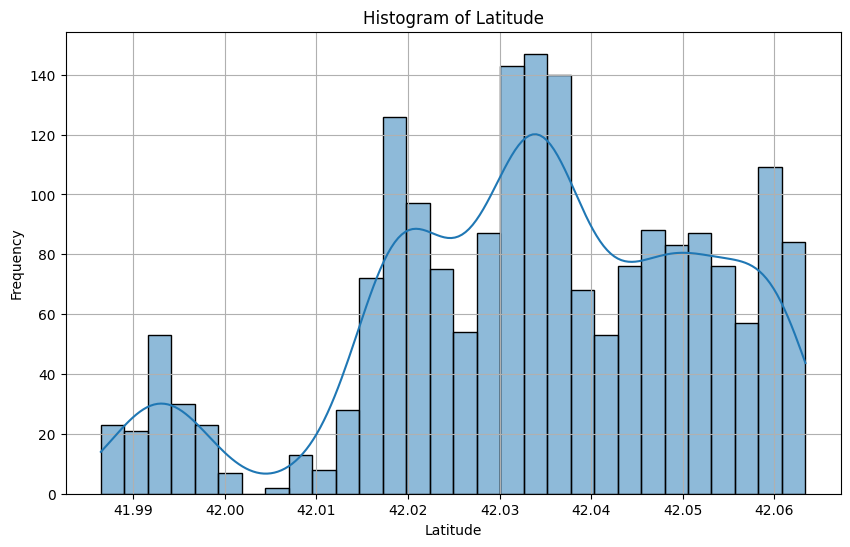

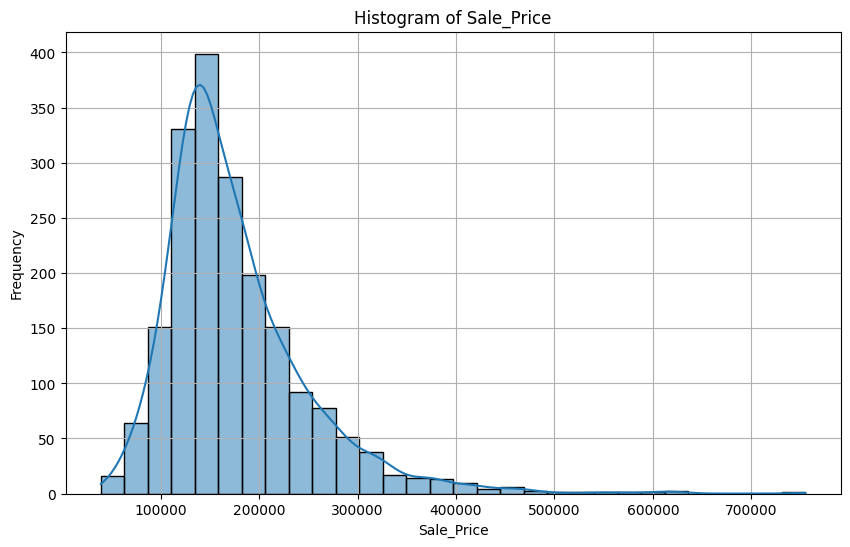

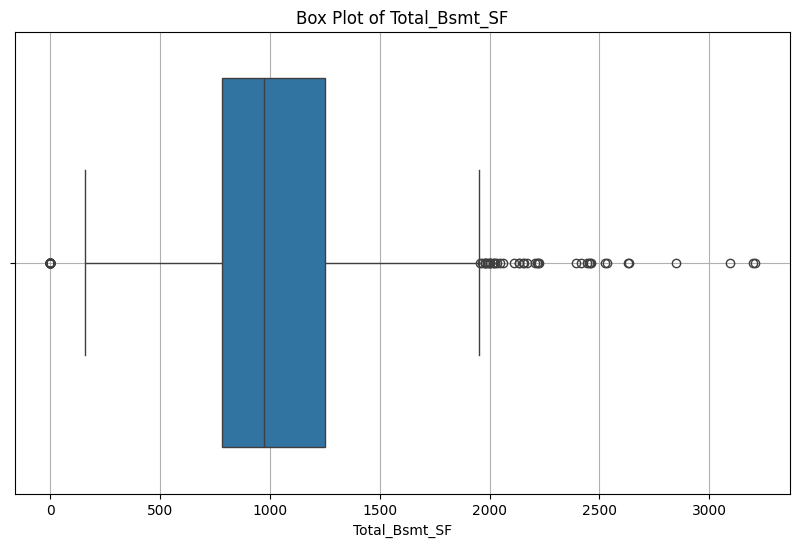

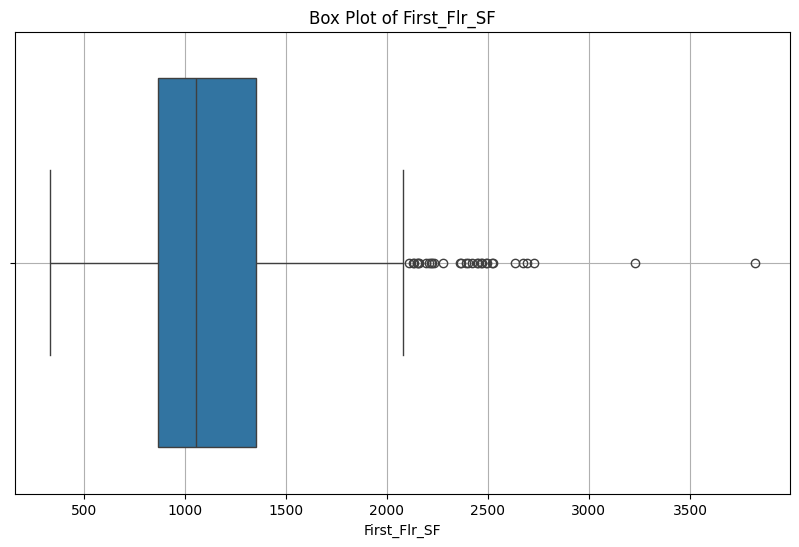

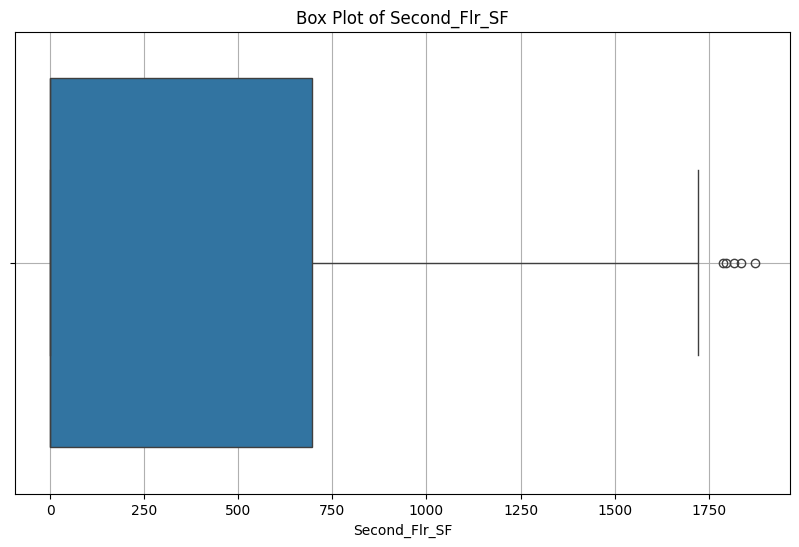

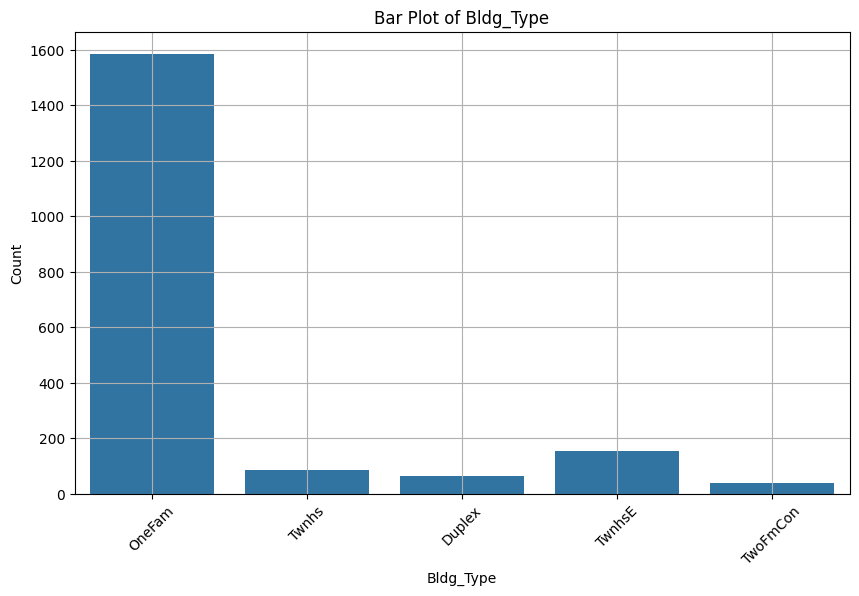

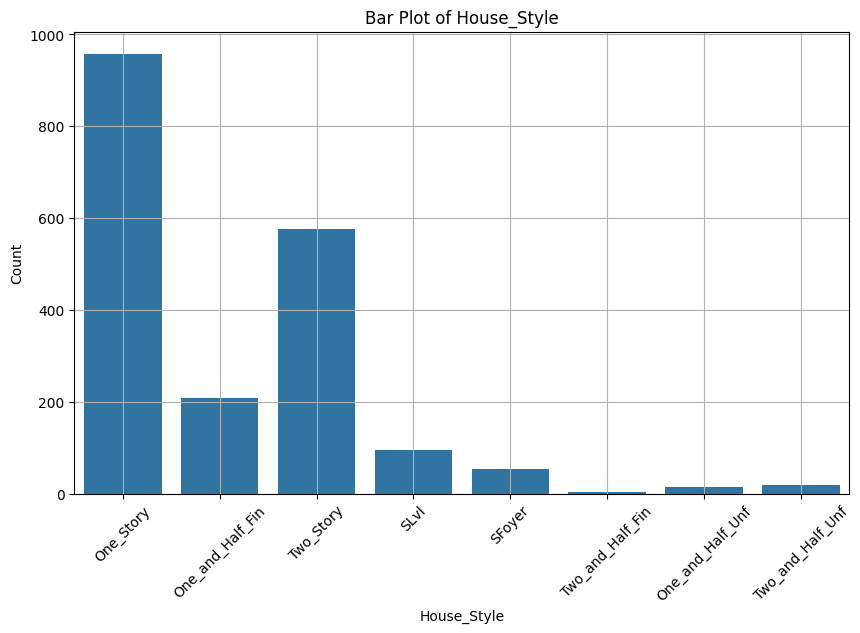

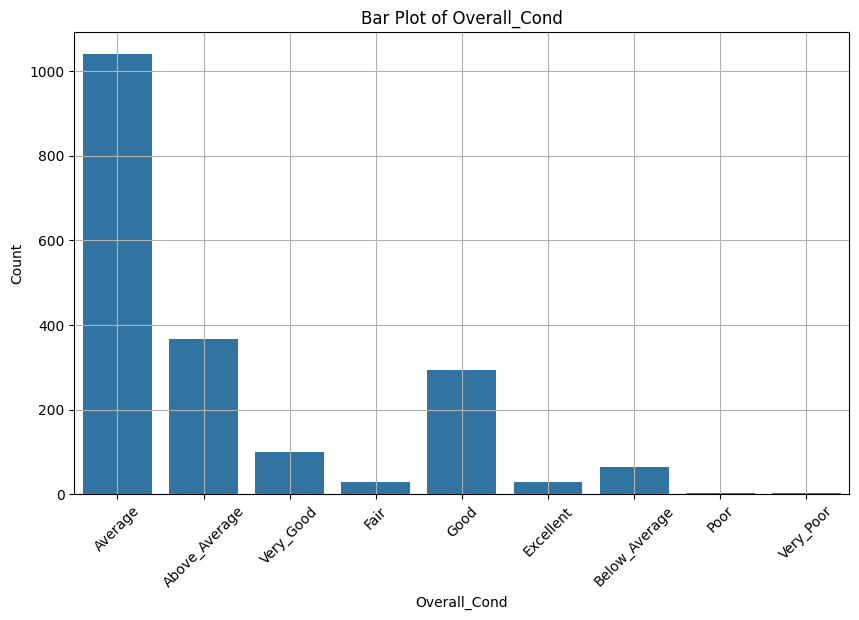

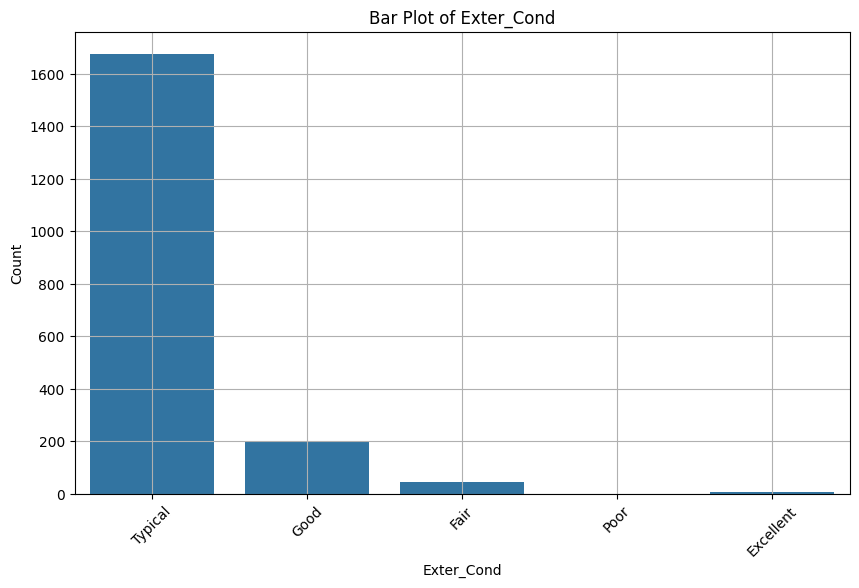

In [43]:
# Function to create histograms for specified columns
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))  # Set the figure size for each plot
        sns.histplot(df[col], kde=True, bins=30)  # Plot a histogram with a kernel density estimate (KDE) line
        plt.title(f'Histogram of {col}')  # Set the title of the plot
        plt.xlabel(col)  # Label the x-axis with the column name
        plt.ylabel('Frequency')  # Label the y-axis with 'Frequency'
        plt.grid(True)  # Enable gridlines for better readability
        plt.show()  # Display the plot

# Function to create box plots for specified columns
def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))  # Set the figure size for each plot
        sns.boxplot(x=df[col])  # Plot a boxplot for the specified column
        plt.title(f'Box Plot of {col}')  # Set the title of the plot
        plt.xlabel(col)  # Label the x-axis with the column name
        plt.grid(True)  # Enable gridlines for better readability
        plt.show()  # Display the plot

# Function to create bar plots for specified columns
def plot_barplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))  # Set the figure size for each plot
        sns.countplot(x=df[col])  # Plot a bar plot (count plot) for the specified column
        plt.title(f'Bar Plot of {col}')  # Set the title of the plot
        plt.xlabel(col)  # Label the x-axis with the column name
        plt.ylabel('Count')  # Label the y-axis with 'Count'
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.grid(True)  # Enable gridlines for better readability
        plt.show()  # Display the plot

# Define the columns for graphical analysis
histogram_columns = ['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Fireplaces',
 'Longitude',
 'Latitude',
 'Sale_Price']


# Columns for creating box plots
boxplot_columns = ['Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF']

# Columns for creating bar plots
barplot_columns = ['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']

# Generate and display the histograms for the specified columns
plot_histograms(train_df, histogram_columns)

# Generate and display the box plots for the specified columns
plot_boxplots(train_df, boxplot_columns)

# Generate and display the bar plots for the specified columns
plot_barplots(train_df, barplot_columns)

### Summary of the various categorical variables in the dataset:

- Bldg_Type:

    OneFam is the most common building type, comprising 82.12% of the dataset with 1,585 occurrences.

    TwnhsE follows at 8.03% with 155 instances.

    Twnhs and Duplex represent 4.40% and 3.32% respectively, while TwoFmCon is the least common at 2.12%.

- House_Style:

    One_Story is the most prevalent house style at 49.64% with 958 occurrences.

    Two_Story is the second most common, making up 29.84% with 576 instances.

    One_and_Half_Fin is at 10.83%, while the other styles are less frequent, with Two_and_Half_Fin being the rarest at 0.21%.

- Overall_Cond:

    Average condition is most frequent, appearing in 53.89% of the records.

    Above_Average and Good follow at 19.07% and 15.18% respectively.

    Very_Good accounts for 5.18%, while Poor and Very_Poor are rare, each below 0.2%.

- Exter_Cond:

    Typical condition is dominant, representing 86.79% of the dataset with 1,675 occurrences.

    Good is the next most frequent at 10.47%.
    
    Fair and Excellent are less common, with Poor being extremely rare at just 0.05%.


### Summary of Descriptive Statistics:

- Lot_Frontage: The average lot frontage is approximately 55 feet, with values ranging from 0 to 313 feet. There is moderate variation in lot size, as indicated by a standard deviation of 33.82 feet.

- Lot_Area: The mean lot area is about 10,051 square feet, with a wide range from 1,470 to 215,245 square feet. The high standard deviation of 8,520 square feet suggests significant variability in lot sizes.

- Year_Built: Homes are generally built around 1970, with a range spanning from 1872 to 2010. The data shows that most homes are fairly recent, with the 25th percentile at 1954 and the 75th percentile at 1998.

- Total_Bsmt_SF: The average basement area is 1,028 square feet, with some variation (standard deviation of 415 square feet). Basement sizes range from 0 to 3,206 square feet.

- First_Flr_SF: The average first-floor area is 1,137 square feet, with a broad range from 334 to 3,820 square feet. This shows significant differences in first-floor sizes among homes.

- Second_Flr_SF: The mean second-floor area is 335 square feet, but many homes have no second floor, resulting in a large standard deviation of 424 square feet. Most homes either have no second floor or a small one.

- Full_Bath: On average, homes have about 1.55 full bathrooms, with values ranging from 0 to 4. The standard deviation of 0.54 reflects moderate variability in the number of bathrooms.

- Half_Bath: The average number of half bathrooms is 0.38, with most homes having none or one. The low standard deviation (0.50) indicates that the number of half bathrooms is fairly consistent.

- Bedroom_AbvGr: Homes typically have about 2.86 bedrooms above ground, ranging from 0 to 6. The data shows a moderate spread with a standard deviation of 0.81.

- Kitchen_AbvGr: On average, homes have just over one kitchen above ground. Most homes have one or none, with a low standard deviation (0.20).

- Fireplaces: Homes generally have about 0.61 fireplaces, with a range from 0 to 4. The standard deviation of 0.64 reflects a wide variation in the number of fireplaces.

- Longitude and Latitude: The longitude varies slightly around -93.64, and the latitude around 42.03, with very narrow ranges and low standard deviations, indicating the dataset is geographically concentrated.

- Sale_Price: The average sale price is $176,115, with significant variation (standard deviation of $72,495) and a range from $39,300 to $755,000. This suggests a wide disparity in property values.


### Summary of the distribution of the features in the dataset:

- Lot_Frontage:

    The distribution of Lot_Frontage is nearly symmetric, with a skewness of -0.081, indicating a balanced spread of values around the mean.

    The kurtosis is 1.166, showing slightly more pronounced tails compared to a normal distribution.

    There are 124 unique values, suggesting a considerable variety in lot frontage measurements.

- Lot_Area:

    The distribution is highly positively skewed with a skewness of 13.394, indicating a long tail on the right with most properties having smaller lot areas and a few very large ones.

    The kurtosis is 270.466, highlighting extremely heavy tails and significant outliers.

    With 1,652 unique values, the lot area sizes vary widely.

- Year_Built:

    The distribution is slightly negatively skewed, with a skewness of -0.587, suggesting that more houses were built in recent years.

    The kurtosis of -0.439 indicates a slight platykurtic distribution with fewer extreme values.

    There are 114 unique years, representing a variety of construction years.

- Total_Bsmt_SF:

    The distribution has a skewness of 0.456, moderately positively skewed with more smaller basement sizes and some larger ones.

    Kurtosis is 1.716, indicating heavier tails than normal and the presence of some extreme values.

    There are 943 unique values, showing a wide range of basement sizes.

- First_Flr_SF:

    The distribution is positively skewed with a skewness of 1.043, indicating more houses with smaller first-floor square footage.

    The kurtosis is 2.257, showing heavier tails than normal with some larger outliers.

    There are 979 unique values, reflecting a diverse range of first-floor sizes.

- Second_Flr_SF:

    The distribution has a skewness of 0.804, moderately positively skewed with more houses having smaller second-floor areas.

    Kurtosis is -0.559, slightly platykurtic with fewer extreme values.

    There are 569 unique values, reflecting moderate variety in second-floor sizes.

- Full_Bath:

    The distribution is slightly positively skewed with a skewness of 0.245, indicating a small right tail.

    The kurtosis is -0.570, slightly platykurtic, showing fewer extreme values.

    There are 5 unique values, representing the number of full bathrooms.

- Half_Bath:

    The distribution is moderately positively skewed with a skewness of 0.664, showing a right tail.

    Kurtosis is -1.163, platykurtic, indicating fewer extreme values.

    There are 3 unique values, reflecting the number of half bathrooms.

- Bedroom_AbvGr:

    The distribution is nearly symmetric with a skewness of 0.184, suggesting a balanced range of bedroom counts.

    The kurtosis is 1.472, indicating slightly heavier tails than normal.

    There are 7 unique values, showing various counts of bedrooms above ground.

- Kitchen_AbvGr:

    The distribution is highly positively skewed with a skewness of 4.682, with most houses having one kitchen and a few having more.

    The kurtosis is 21.975, featuring extremely heavy tails and significant outliers.

    There are 4 unique values, reflecting the number of kitchens above ground.

- Fireplaces:

    The distribution has a skewness of 0.739, moderately positively skewed with more houses having fewer fireplaces.

    Kurtosis is 0.138, close to normal with slightly heavier tails.

    There are 5 unique values, showing the range of fireplace counts in houses.

- Longitude:

    The distribution is slightly negatively skewed with a skewness of -0.338, showing a tail on the left.

    The kurtosis is -0.973, platykurtic, indicating fewer extreme values.

    There are 2,309 unique values, reflecting precise location data.

- Latitude:

    The distribution has a skewness of -0.508, moderately negatively skewed with a left tail.

    Kurtosis is -0.083, nearly normal with minor deviations.

    There are 2,303 unique values, indicating detailed property location data.

- Sale_Price:

    The distribution is highly positively skewed with a skewness of 1.745, showing more lower sale prices and some very high ones.

    Kurtosis is 5.826, featuring very heavy tails and significant outliers.

    There are 790 unique values, indicating a broad range of sale prices.

#### __Multivariate Analysis__

Multivariate analysis explores relationships between two or more features/variables. This section will be focussed on understanding how the features in our dataset correlate with the target feature(Sales Price). This will help to understand which varibales are necessary or useful for my model training.

#### __Non-Graphical Multivariate Analysis__

#### Correlation Analysis:
Identify which numerical features are most correlated with Sale_Price.

In [ ]:
# Create a list of numerical variables
numerical_features = ['Sale_Price', 'Lot_Frontage', 'Lot_Area', 'Year_Built', 
                      'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 
                      'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 
                      'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude']

# Compute the correlation matrix only for numerical features
corr_matrix = train_df[numerical_features].corr()

# Sort the correlation matrix by Sale_Price
correlation_with_target = corr_matrix['Sale_Price'].sort_values(ascending=False)
print(correlation_with_target)

Sale_Price       1.000000
Total_Bsmt_SF    0.648240
First_Flr_SF     0.644837
Full_Bath        0.540967
Year_Built       0.528365
Fireplaces       0.489734
Half_Bath        0.292630
Second_Flr_SF    0.290419
Lot_Area         0.272392
Latitude         0.245497
Bedroom_AbvGr    0.178386
Lot_Frontage     0.163115
Kitchen_AbvGr   -0.107611
Longitude       -0.258842
Name: Sale_Price, dtype: float64


From the various correlation co-efficients for each of the numerical variables, these are some of the inferences we can make:

Key Drivers: Features like basement size, first-floor size, number of full bathrooms, and the year the house was built are significant drivers of house prices.

Geographical Influence: Both latitude and longitude show correlations, hinting that location within the area studied has an impact on sale prices.

Outliers/Anomalies: The negative correlation with Longitude and Kitchen_AbvGr suggests that there might be specific location-related factors or market preferences influencing these features.

#### Groupby Analysis:
Group by categorical variables to compare average Sale_Price across different categories.

In [ ]:
# Group by Bldg_Type and calculate the mean Sale_Price
avg_sale_price_by_bldg_type = train_df.groupby('Bldg_Type')['Sale_Price'].mean().sort_values(ascending=False)

avg_sale_price_by_bldg_type

Bldg_Type
TwnhsE      183207.870968
OneFam      180089.353943
Duplex      142306.484375
Twnhs       137741.058824
TwoFmCon    127990.853659
Name: Sale_Price, dtype: float64

In [ ]:
# Group by House_Style and calculate the mean Sale_Price
avg_sale_price_by_house_style = train_df.groupby('House_Style')['Sale_Price'].mean().sort_values(ascending=False)

avg_sale_price_by_house_style

House_Style
Two_and_Half_Fin    285125.000000
Two_Story           198523.958333
Two_and_Half_Unf    183870.000000
One_Story           173039.798539
SLvl                169170.368421
SFoyer              142503.888889
One_and_Half_Fin    142106.478469
One_and_Half_Unf    106828.571429
Name: Sale_Price, dtype: float64

#### ANOVA (Analysis of Variance):
To check if the means of Sale_Price across different categories of categorical variables are significantly different.

In [ ]:
# ANOVA for Sale_Price across different Bldg_Type
f_stat, p_value = f_oneway(*[group["Sale_Price"].values for name, group in train_df.groupby("Bldg_Type")])
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

ANOVA F-statistic: 15.995156967151086, P-value: 6.875397050056259e-13


The extremely low p-value (far below the common significance level of 0.05) indicates that we reject the null hypothesis. This result suggests that there are statistically significant differences in `Sale_Price` among the different `Bldg_Type` categories. In other words, the type of building significantly influences the sale price of a property, and this variation is unlikely due to random chance.

In [ ]:
# ANOVA for Sale_Price across different House_Style
f_stat, p_value = f_oneway(*[group["Sale_Price"].values for name, group in train_df.groupby("House_Style")])
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

ANOVA F-statistic: 21.040251417889703, P-value: 1.849879928995216e-27


The extremely low p-value (far below the typical significance level of 0.05) indicates that we reject the null hypothesis. This suggests that there are statistically significant differences in `Sale_Price` among the different `House_Style` categories. The type of house style plays a substantial role in determining the sale price, and these differences are highly unlikely to be due to random variation.

In [ ]:
# ANOVA for Sale_Price across different conditions of the houses
f_stat, p_value = f_oneway(*[group["Sale_Price"].values for name, group in train_df.groupby("Overall_Cond")])
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

ANOVA F-statistic: 39.90803392208425, P-value: 3.2165023584025035e-59


The extremely low p-value (significantly lower than the standard significance level of 0.05) indicates that we reject the null hypothesis. This result strongly suggests that there are statistically significant differences in `Sale_Price` among houses with different overall condition ratings. The condition of a house has a substantial impact on its sale price, and the differences observed are highly unlikely to be due to random chance.

In [ ]:
# ANOVA for Sale_Price across different conditions of the exterior conditions
f_stat, p_value = f_oneway(*[group["Sale_Price"].values for name, group in train_df.groupby("Exter_Cond")])
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

ANOVA F-statistic: 8.851055671801037, P-value: 4.4291025834429006e-07


The very low p-value (well below the common significance threshold of 0.05) indicates that we reject the null hypothesis. This suggests that there are statistically significant differences in `Sale_Price` among houses with different `Exter_Cond` ratings. The condition of the exterior of a house has a noticeable impact on its sale price, and the observed differences are unlikely to be due to random chance. This implies that better exterior conditions generally lead to higher sale prices.

#### __Graphical Multivariate Analysis__

Pairplot:
A pairplot will help me visualize the relationships between multiple features and Sale_Price.

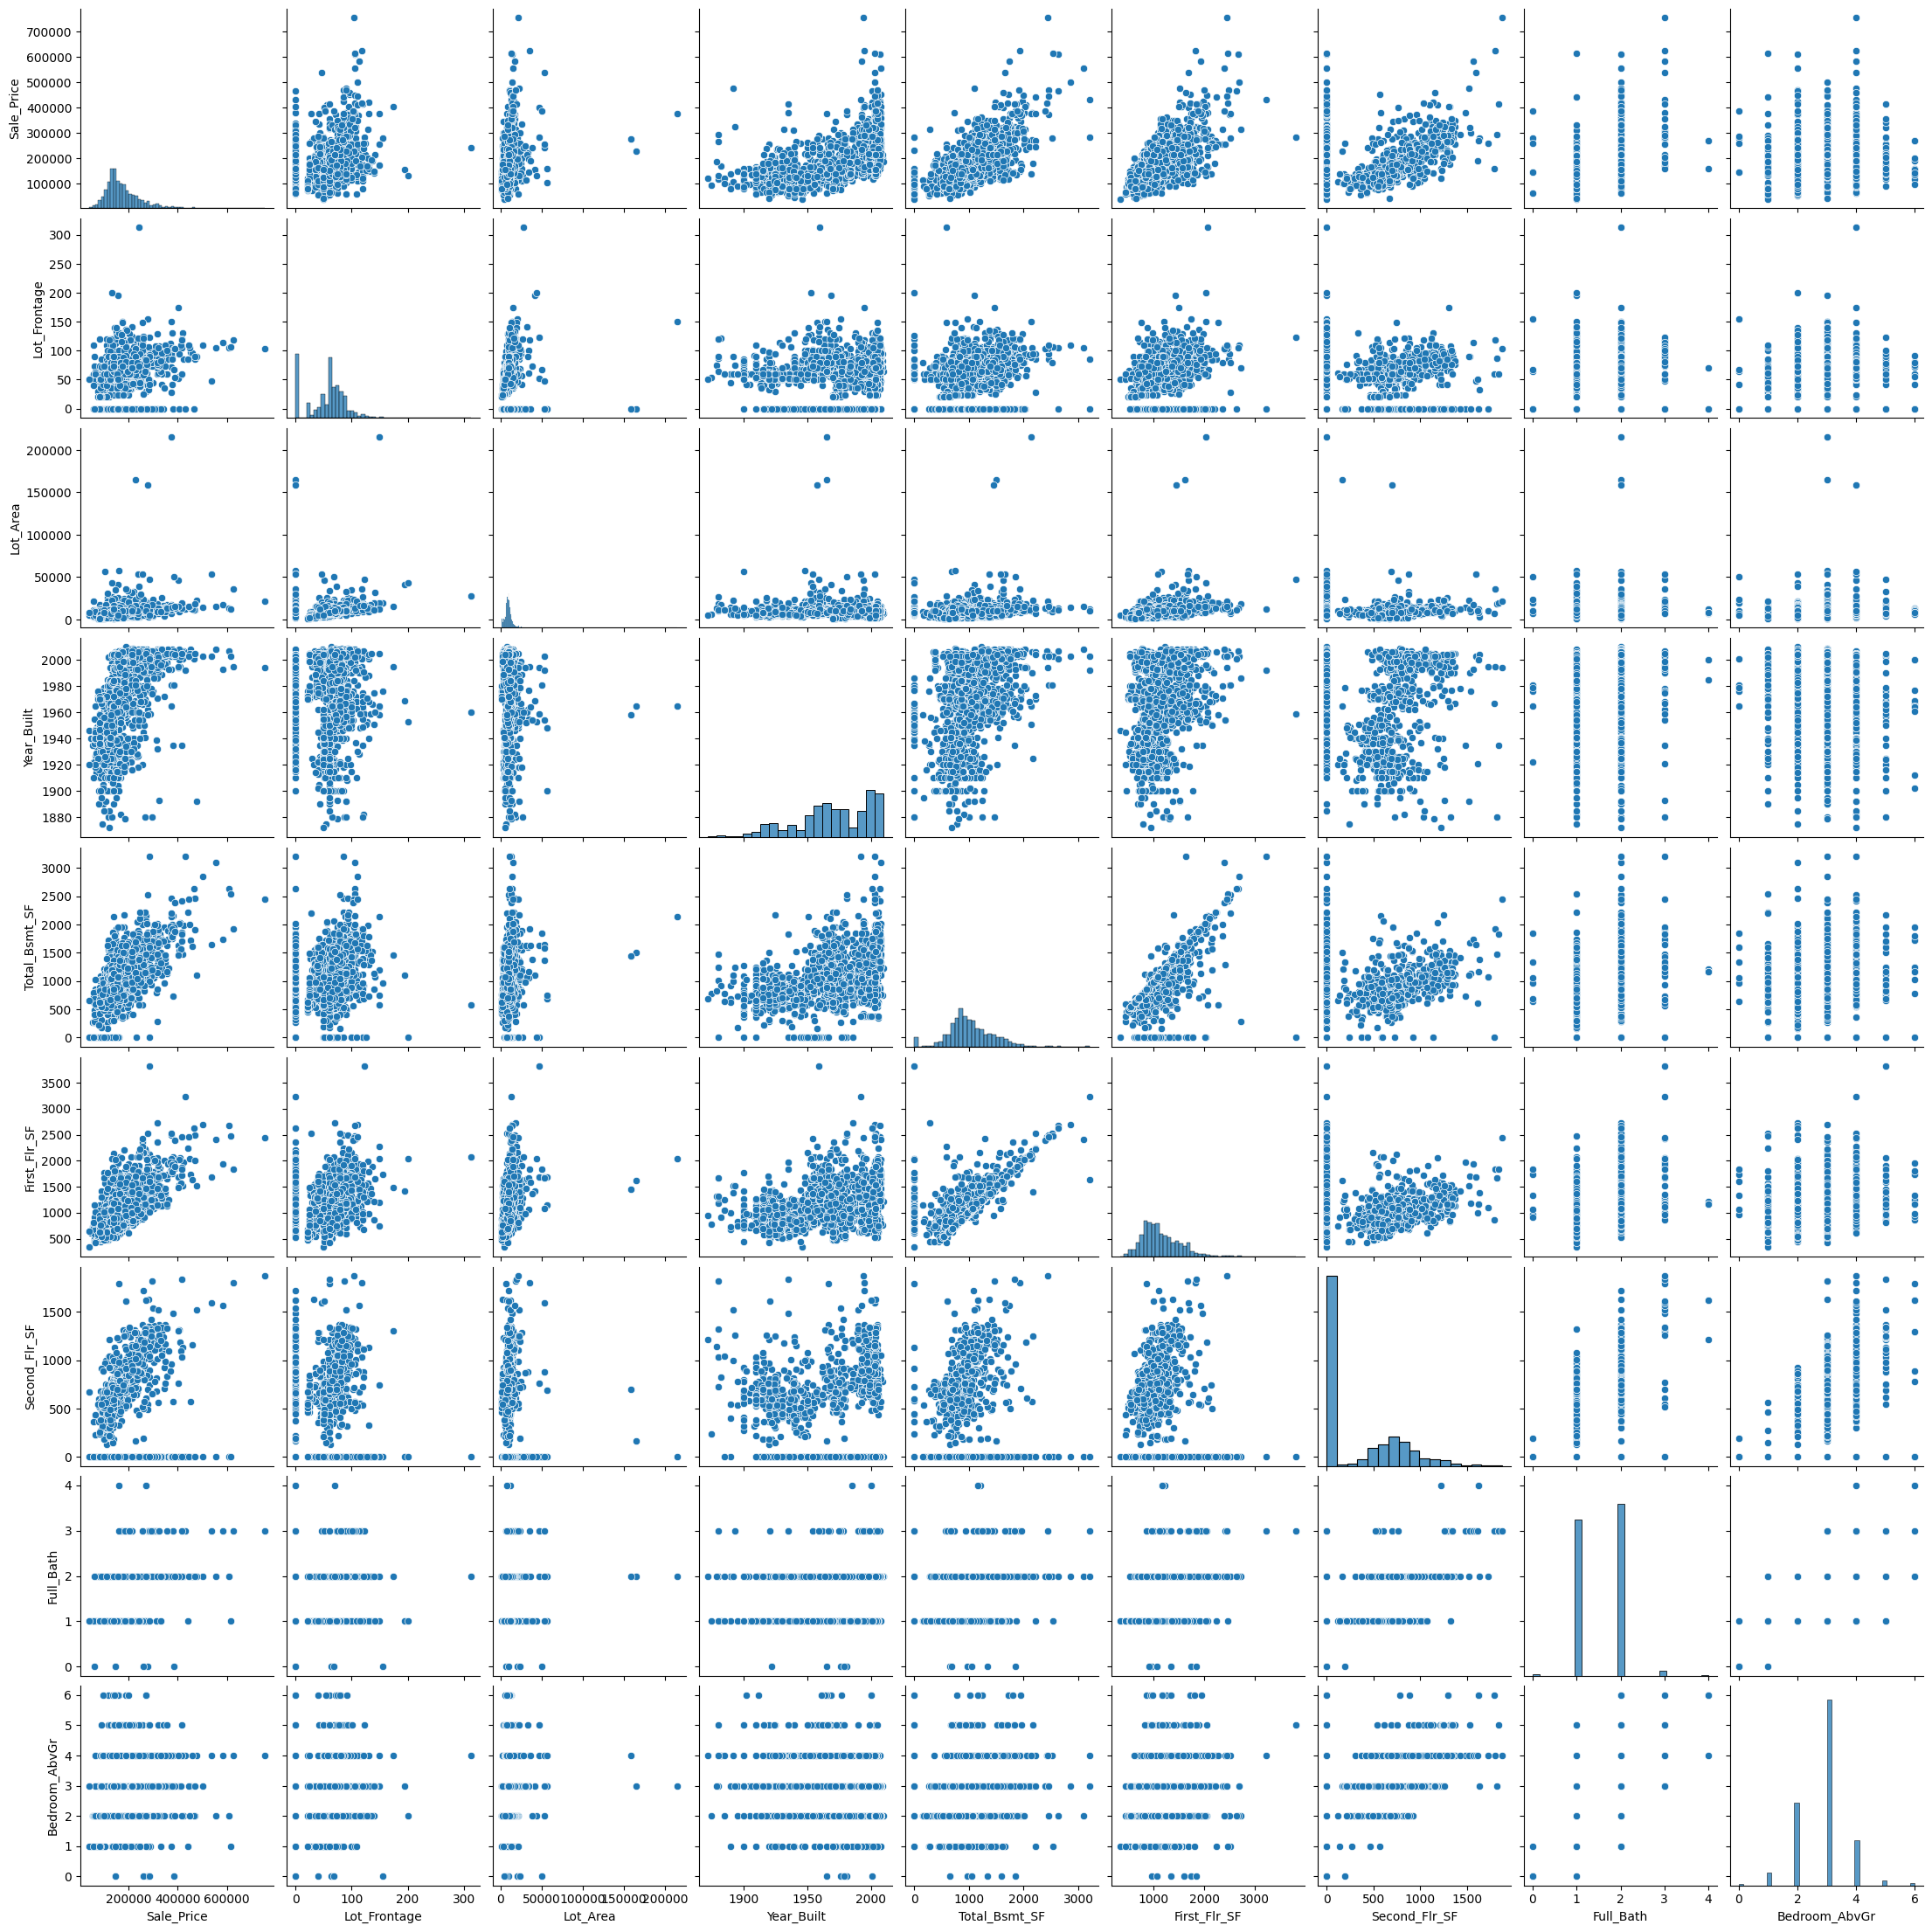

In [ ]:
# Select relevant features for pairplot
selected_features = ['Sale_Price', 'Lot_Frontage', 'Lot_Area', 'Year_Built', 
                     'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 
                     'Full_Bath', 'Bedroom_AbvGr']

sns.pairplot(train_df[selected_features])
plt.show()

Correlation Heatmap:
To visualize the correlation between Sale_Price and other numerical features.

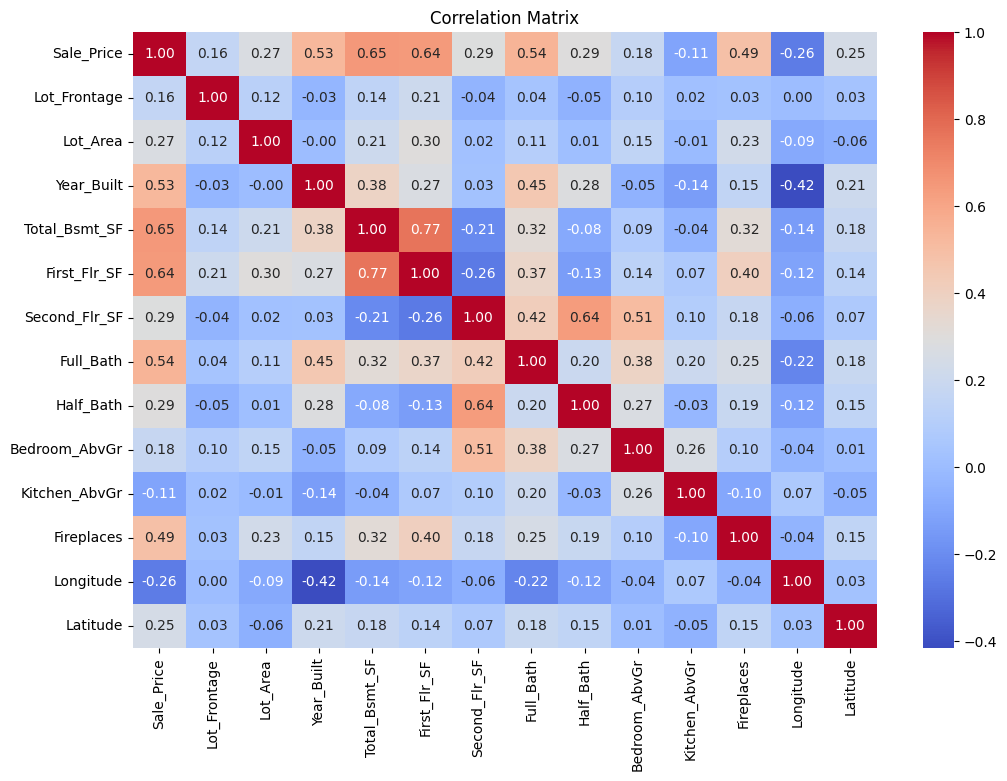

In [ ]:
# Compute the correlation matrix for numerical features
corr_matrix = train_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

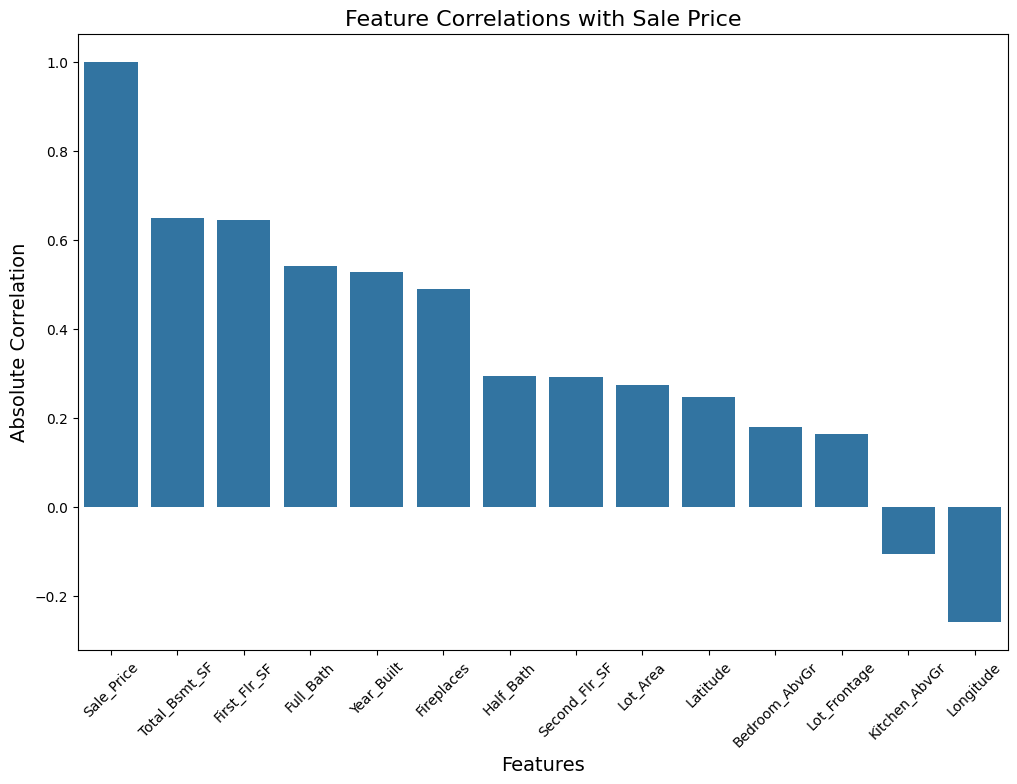

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)

# Add titles and labels
plt.title('Feature Correlations with Sale Price', fontsize=16)
plt.ylabel('Absolute Correlation', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tick_params(axis='x', rotation=45)

# Display the plot
plt.show()

### __FEATURE ENGINEERING__

I will engineer new features from the existing data so that my machine learning model can be have more features to work with and improve performance. The new features will revolve around

1. The age of the house 

2. The decade the house was built

#### Feature engineering for training set

In [ ]:
# Calculate the age of the house using the current year
current_year = datetime.now().year
train_df['HouseAge (Years)'] = current_year - train_df['Year_Built']

# Determine the decade in which the house was built
train_df['DecadeBuilt'] = train_df['Year_Built'].apply(lambda x: (x // 10) * 10)

In [ ]:
# Preview first five rows
train_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,...,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price,IsOutlier,HouseAge (Years),DecadeBuilt
765,85,10200,OneFam,One_Story,Average,2007,Typical,1578,1602,0,...,0,3,1,1,-93.684115,42.016468,293200,False,17,2000
2387,54,13811,OneFam,One_Story,Above_Average,1987,Typical,1112,1137,0,...,0,2,1,1,-93.646099,41.999553,176000,True,37,1980
2162,60,10800,OneFam,One_and_Half_Fin,Very_Good,1936,Typical,796,1096,370,...,0,3,1,1,-93.613899,42.034761,170000,True,88,1930
1833,79,9245,OneFam,Two_Story,Average,2006,Typical,939,939,858,...,1,3,1,0,-93.684137,42.014823,213500,False,18,2000
1814,120,10356,OneFam,One_Story,Above_Average,1975,Typical,969,969,0,...,1,3,1,0,-93.684354,42.021025,122000,True,49,1970


#### Feature engineering for test set

In [ ]:
# Calculate the age of the house using the current year
current_year = datetime.now().year
test_df['HouseAge (Years)'] = current_year - test_df['Year_Built']

# Determine the decade in which the house was built
test_df['DecadeBuilt'] = test_df['Year_Built'].apply(lambda x: (x // 10) * 10)

In [ ]:
# Preview first five rows
test_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,...,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price,IsOutlier,HouseAge (Years),DecadeBuilt
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,...,0,2,1,0,-93.619756,42.053014,105000,True,63,1960
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,...,1,3,1,1,-93.638933,42.060899,189900,False,27,1990
11,0,7980,OneFam,One_Story,Good,1992,Good,1168,1187,0,...,0,3,1,0,-93.635951,42.057419,185000,True,32,1990
16,152,12134,OneFam,One_and_Half_Fin,Good,1988,Typical,559,1080,672,...,0,4,1,0,-93.623595,42.060351,164000,True,36,1980
19,105,11751,OneFam,One_Story,Above_Average,1977,Typical,1844,1844,0,...,0,3,1,1,-93.633962,42.050346,190000,True,47,1970


#### Feature engineering for df2_without_outliers that we created earlier

In [ ]:
# Calculate the age of the house using the current year
current_year = datetime.now().year
df2_without_outliers['HouseAge (Years)'] = current_year - df2_without_outliers['Year_Built']

# Determine the decade in which the house was built
df2_without_outliers['DecadeBuilt'] = df2_without_outliers['Year_Built'].apply(lambda x: (x // 10) * 10)

In [ ]:
# Preview first five rows
df2_without_outliers.shape

(1852, 21)

### __What is the effect of the new features on the target variable?__

In [ ]:
# Calculate the correlation of HouseAge and DecadeBuilt with Sale_Price
house_age_corr = train_df[['HouseAge (Years)', 'Sale_Price']].corr().loc['HouseAge (Years)', 'Sale_Price']
decade_built_corr = train_df[['DecadeBuilt', 'Sale_Price']].corr().loc['DecadeBuilt', 'Sale_Price']

# Print the correlations
print(f"Correlation between HouseAge and Sale_Price: {house_age_corr}")
print(f"Correlation between DecadeBuilt and Sale_Price: {decade_built_corr}")

Correlation between HouseAge and Sale_Price: -0.5283650043519147
Correlation between DecadeBuilt and Sale_Price: 0.525803685774296


### __FEATURE SELECTION FOR MACHINE LEARNING__

This phase will be used to select features that are necessary for my machine learning as a result of their effect on the target variable as established from the exploratory data analysis carried out earlier. I will be doing that for both the train_df and the df2_without_outliers.

#### Numerical features to be considered

Based on the correlations with the target variable `Sale_Price`,

Features to Use:

1. Total_Bsmt_SF: Correlation of 0.648 (high positive correlation)
2. First_Flr_SF: Correlation of 0.645 (high positive correlation)
3. Full_Bath: Correlation of 0.541 (moderate to high positive correlation)
4. Year_Built: Correlation of 0.528 (moderate to high positive correlation)
5. Fireplaces: Correlation of 0.490 (moderate positive correlation)
6. Half_Bath: Correlation of 0.293 (low positive correlation)
7. Second_Flr_SF: Correlation of 0.290 (low positive correlation)
8. Lot_Area: Correlation of 0.272 (low positive correlation)
9. DecadeBuilt: Correlation of 0.526 with (moderate positive relationship)

Features with Lower or Negative Correlation (Considered Less Relevant):

1. Latitude: Correlation of 0.245
2. Bedroom_AbvGr: Correlation of 0.178
3. Lot_Frontage: Correlation of 0.163
4. Kitchen_AbvGr: Correlation of -0.108 (negative correlation)
5. Longitude: Correlation of -0.259 (negative correlation)
6. HouseAge: Correlation of -0.528 with `Sale_Price` (moderate negative relationship)

In [ ]:
# Create a variable for the numerical features
ml_features_numerical = [
    'Total_Bsmt_SF',
    'First_Flr_SF',
    'Full_Bath',
    'Year_Built',
    'Fireplaces',
    'Half_Bath',
    'Second_Flr_SF',
    'Lot_Area',
    'DecadeBuilt'
]

#### Categorical features to be considered

1. Bldg_Type:

    Reason: Significant differences in Sale_Price across building types, highlighting its impact on price.

2. House_Style:

    Reason: House style significantly affects Sale_Price, as shown by the low p-value.

3. Overall_Cond:

    Reason: The condition of the house has a notable impact on Sale_Price, indicated by the low p-value.

4. Exter_Cond:

    Reason: Exterior condition significantly influences Sale_Price, based on the low p-value.

In [ ]:
# Create a varibale for the categorical features
ml_categorical_features = [
    'Bldg_Type',
    'House_Style',
    'Overall_Cond',
    'Exter_Cond'
]

#### Creating the datasets needed for my modelling using only the features needed

In [ ]:
# training set from the dataframe with outliers
training_ml_df = train_df[[
    'Total_Bsmt_SF',
    'First_Flr_SF',
    'Full_Bath',
    'Year_Built',
    'Fireplaces',
    'Half_Bath',
    'Second_Flr_SF',
    'Lot_Area',
    'DecadeBuilt',
    'Bldg_Type',
    'House_Style',
    'Overall_Cond',
    'Exter_Cond'
    ]]

# test set from the dataframe with outliers
test_ml_df = test_df[[
    'Total_Bsmt_SF',
    'First_Flr_SF',
    'Full_Bath',
    'Year_Built',
    'Fireplaces',
    'Half_Bath',
    'Second_Flr_SF',
    'Lot_Area',
    'DecadeBuilt',
    'Bldg_Type',
    'House_Style',
    'Overall_Cond',
    'Exter_Cond'
    ]]

# dataset from the dataframe without outliers
df2_without_outliers_ml = df2_without_outliers[[
    'Total_Bsmt_SF',
    'First_Flr_SF',
    'Full_Bath',
    'Year_Built',
    'Fireplaces',
    'Half_Bath',
    'Second_Flr_SF',
    'Lot_Area',
    'DecadeBuilt',
    'Bldg_Type',
    'House_Style',
    'Overall_Cond',
    'Exter_Cond'
    ]]

### __MACHINE LEARNING__

For the modelling phase of this project to predict house prices, I will do it in two phases as I earlier mentioned:

1. Modelling with data containing outliers

2. Modelling with data without outliers

For each of the phases with the two datasets, I will be using 3 models to predict house prices and evaluate them for the best one

1. Linear Regression

2. Random Forest Regressor

3. XGBoost Regressor

Before doing the machine learning, let me covert all categorical data to numerical values since the models won't work with categorical data

#### __Encoding all the dataframes before machine learning proper__

In [ ]:
# Initialize the encoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder on the training data since the model only needs to learn the categories once and they are the same across the 3 datasets
one_hot_encoder.fit(training_ml_df[['Bldg_Type', 'House_Style', 'Exter_Cond']])

# Transform the train, test, and df2_without_outliers datasets
encoded_train = one_hot_encoder.transform(training_ml_df[['Bldg_Type', 'House_Style', 'Exter_Cond']])
encoded_test = one_hot_encoder.transform(test_ml_df[['Bldg_Type', 'House_Style', 'Exter_Cond']])
encoded_df2_without_outliers = one_hot_encoder.transform(df2_without_outliers_ml[['Bldg_Type', 'House_Style', 'Exter_Cond']])

# Convert the encoded data to DataFrames with appropriate column names
encoded_train_df = pd.DataFrame(encoded_train, columns=one_hot_encoder.get_feature_names_out(['Bldg_Type', 'House_Style', 'Exter_Cond']))
encoded_test_df = pd.DataFrame(encoded_test, columns=one_hot_encoder.get_feature_names_out(['Bldg_Type', 'House_Style', 'Exter_Cond']))
encoded_df2_without_outliers_df = pd.DataFrame(encoded_df2_without_outliers, columns=one_hot_encoder.get_feature_names_out(['Bldg_Type', 'House_Style', 'Exter_Cond']))

# Concatenate with original data
training_ml_df = pd.concat([train_df.reset_index(drop=True), encoded_train_df], axis=1)
test_ml_df = pd.concat([test_df.reset_index(drop=True), encoded_test_df], axis=1)
df2_without_outliers_ml = pd.concat([df2_without_outliers.reset_index(drop=True), encoded_df2_without_outliers_df], axis=1)

# Drop original categorical columns
training_ml_df.drop(['Bldg_Type', 'House_Style', 'Exter_Cond'], axis=1, inplace=True)
test_ml_df.drop(['Bldg_Type', 'House_Style', 'Exter_Cond'], axis=1, inplace=True)
df2_without_outliers_ml.drop(['Bldg_Type', 'House_Style', 'Exter_Cond'], axis=1, inplace=True)

In [ ]:
# Using mapping for Overall_Cond since its an ordinal data for both test and train

# Define the order of the categories
overall_cond_order = {
    'Very_Poor': 1,
    'Poor': 2,
    'Below_Average': 3,
    'Fair': 4,
    'Average': 5,
    'Above_Average': 6,
    'Good': 7,
    'Very_Good': 8,
    'Excellent': 9
}

# Apply the mapping to the Overall_Cond column in both train_df, test_df, df2_without_outliers
training_ml_df['Overall_Cond'] = training_ml_df['Overall_Cond'].map(overall_cond_order)
test_ml_df['Overall_Cond'] = test_ml_df['Overall_Cond'].map(overall_cond_order)
df2_without_outliers_ml['Overall_Cond'] = df2_without_outliers_ml['Overall_Cond'].map(overall_cond_order)

### __MODELLING WITH DATAFRAME CONTAINING OUTLIERS- df__

The df has been splitted already before carrying out EDA to prevent data leakage

In [ ]:
# View our training set
training_ml_df.head()

,Lot_Frontage,Lot_Area,Overall_Cond,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,...,House_Style_SFoyer,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Exter_Cond_Excellent,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical
0,85,10200,5,2007,1578,1602,0,2,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,54,13811,6,1987,1112,1137,0,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,10800,8,1936,796,1096,370,2,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,79,9245,5,2006,939,939,858,2,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,120,10356,6,1975,969,969,0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# View the test set
test_ml_df.head()

,Lot_Frontage,Lot_Area,Overall_Cond,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,...,House_Style_SFoyer,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Exter_Cond_Excellent,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical
0,80,11622,6,1961,882,896,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,74,13830,5,1997,928,928,701,2,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,7980,7,1992,1168,1187,0,2,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,152,12134,7,1988,559,1080,672,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,105,11751,6,1977,1844,1844,0,2,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_ml_df.to_csv('test data for chatgpt.csv')

#### __Modelling the df(with outliers) using Linear Regression__

In [ ]:
# Separate the features (X) and the target variable (y)

# X is assigned the entire DataFrame except for the 'Sale_Price' column
X = training_ml_df.drop(['Sale_Price'], axis=1)

# y is assigned the 'Sale_Price' column, which is the target variable for prediction
y = training_ml_df['Sale_Price']

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X, y) # X_train contains the training features, and y_train contains the corresponding target values

LinearRegression()

In [ ]:
# Initialize the variables from the test dataset that would be used in predicting the target variable
X_test = X = test_ml_df.drop(['Sale_Price'], axis=1)

# Predict the target value for Sales Price
y_pred = linear_model.predict(X_test)

In [ ]:
# Evaluate the model's performance

# Calculate the Mean Squared Error (MSE)
mse_lr_with_outliers = mean_squared_error(test_ml_df['Sale_Price'], y_pred)

# Calculate the R-squared (R^2) score
r2_lr_with_outliers = r2_score(test_ml_df['Sale_Price'], y_pred)

# Calculate the Root Mean Square Error (RMSE)
rmse_lr_with_outliers = np.sqrt(mse_lr_with_outliers)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse_lr_with_outliers}")

# Print the R-squared score
print(f"R^2 Score: {r2_lr_with_outliers}")

# Print the Root Mean Square Error
print(f"Root Mean Square Error: {rmse_lr_with_outliers}")


Mean Squared Error: 657867159.9041076
R^2 Score: 0.8420130154533794
Root Mean Square Error: 25648.92122300873


#### __Modelling the df2_without_outliers_ml(without outliers) using Linear Regression__

In [ ]:
# Separate the features (X) and the target variable (y)

# X is assigned the entire DataFrame except for the 'Sale_Price' column
X = df2_without_outliers_ml.drop(['Sale_Price'], axis=1)

# y is assigned the 'Sale_Price' column, which is the target variable for prediction
y = df2_without_outliers_ml['Sale_Price']

In [ ]:
# Separate the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X, y) # X_train contains the training features, and y_train contains the corresponding target values

LinearRegression()

In [ ]:
# Predict the target value for Sales Price
y_pred = linear_model.predict(X_test)

In [ ]:
# Evaluate the model's performance on the test data (without outliers)

# Calculate the Mean Squared Error (MSE)
mse_lr_without_outliers = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R²) score
r2_lr_without_outliers = r2_score(y_test, y_pred)

# Calculate the Root Mean Square Error (RMSE)
rmse_lr_without_outliers = np.sqrt(mse_lr_without_outliers)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse_lr_without_outliers}")

# Print the R-squared score
print(f"R^2 Score: {r2_lr_without_outliers}")

# Print the Root Mean Square Error
print(f"Root Mean Square Error: {rmse_lr_without_outliers}")

Mean Squared Error: 608186193.5088243
R^2 Score: 0.8500533094320352
Root Mean Square Error: 24661.431294813858


#### __Modelling the df(with outliers) using Random Forest Regressor__

In [ ]:
# Separate the features (X) and the target variable (y)

# X is assigned the entire DataFrame except for the 'Sale_Price' column
X = training_ml_df.drop(['Sale_Price'], axis=1)

# y is assigned the 'Sale_Price' column, which is the target variable for prediction
y = training_ml_df['Sale_Price']

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=95)
rf_model.fit(X, y)

RandomForestRegressor(random_state=95)

In [ ]:
# Initialize the variables from the test dataset that would be used in predicting the target variable
X_test = X = test_ml_df.drop(['Sale_Price'], axis=1)

# Predict the target value for Sales Price
y_pred = linear_model.predict(X_test)

In [ ]:
# Evaluate the Random Forest Regression model's performance on the test data (with outliers)

# Calculate the Mean Squared Error (MSE)
mse_rfr_with_outliers = mean_squared_error(test_ml_df['Sale_Price'], y_pred)

# Calculate the R-squared (R²) score
r2_rfr_with_outliers = r2_score(test_ml_df['Sale_Price'], y_pred)

# Calculate the Root Mean Square Error (RMSE)
rmse_rfr_with_outliers = np.sqrt(mse_rfr_with_outliers)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse_rfr_with_outliers}")

# Print the R-squared score
print(f"R^2 Score: {r2_rfr_with_outliers}")

# Print the Root Mean Square Error
print(f"Root Mean Square Error: {rmse_rfr_with_outliers}")


Mean Squared Error: 635382871.8485961
R^2 Score: 0.8474126235902039
Root Mean Square Error: 25206.80209484329


#### __Modelling the df2_without_outliers_ml(without outliers) using Random Forest Regressor__

In [ ]:
# Separate the features (X) and the target variable (y)

# X is assigned the entire DataFrame except for the 'Sale_Price' column
X = df2_without_outliers_ml.drop(['Sale_Price'], axis=1)

# y is assigned the 'Sale_Price' column, which is the target variable for prediction
y = df2_without_outliers_ml['Sale_Price']

In [ ]:
# Separate the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=80)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=80)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the Random Forest Regression model's performance on the test data (without outliers)

# Calculate the Mean Squared Error (MSE)
mse_rfr_without_outliers = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R²) score
r2_rfr_without_outliers = r2_score(y_test, y_pred)

# Calculate the Root Mean Square Error (RMSE)
rmse_rfr_without_outliers = np.sqrt(mse_rfr_without_outliers)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse_rfr_without_outliers}")

# Print the R-squared score
print(f"R^2 Score: {r2_rfr_without_outliers}")

# Print the Root Mean Square Error
print(f"Root Mean Square Error: {rmse_rfr_without_outliers}")


Mean Squared Error: 546561254.9072628
R^2 Score: 0.8767419398296685
Root Mean Square Error: 23378.649552685092


#### __Modelling the df(with outliers) using XGBoost Regressor__

In [ ]:
# Separate the features (X) and the target variable (y)

# X is assigned the entire DataFrame except for the 'Sale_Price' column
X = training_ml_df.drop(['Sale_Price'], axis=1)

# y is assigned the 'Sale_Price' column, which is the target variable for prediction
y = training_ml_df['Sale_Price']

In [ ]:
xgb_model = XGBRegressor(random_state=60)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=60, ...)

In [ ]:
# Initialize the variables from the test dataset that would be used in predicting the target variable
X_test = X = test_ml_df.drop(['Sale_Price'], axis=1)

# Predict the target value for Sales Price
y_pred = linear_model.predict(X_test)

In [ ]:
# Evaluate the XGBoost Regressor model's performance on the test data (with outliers)

# Calculate the Mean Squared Error (MSE)
mse_xgb_with_outliers = mean_squared_error(test_ml_df['Sale_Price'], y_pred)

# Calculate the R-squared (R²) score
r2_xgb_with_outliers = r2_score(test_ml_df['Sale_Price'], y_pred)

# Calculate the Root Mean Square Error (RMSE)
rmse_xgb_with_outliers = np.sqrt(mse_xgb_with_outliers)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse_xgb_with_outliers}")

# Print the R-squared score
print(f"R^2 Score: {r2_xgb_with_outliers}")

# Print the Root Mean Square Error
print(f"Root Mean Square Error: {rmse_xgb_with_outliers}")


Mean Squared Error: 635382871.8485961
R^2 Score: 0.8474126235902039
Root Mean Square Error: 25206.80209484329


#### __Modelling the df2_without_outliers_ml(without outliers) using XGBoost Regressor__

In [ ]:
# Separate the features (X) and the target variable (y)

# X is assigned the entire DataFrame except for the 'Sale_Price' column
X = df2_without_outliers_ml.drop(['Sale_Price'], axis=1)

# y is assigned the 'Sale_Price' column, which is the target variable for prediction
y = df2_without_outliers_ml['Sale_Price']

In [ ]:
# Separate the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [ ]:
xgb_model = XGBRegressor(random_state=78)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=78, ...)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the XGBoost Regressor model's performance on the test data (without outliers)

# Calculate the Mean Squared Error (MSE)
mse_xgb_without_outliers = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R²) score
r2_xgb_without_outliers = r2_score(y_test, y_pred)

# Calculate the Root Mean Square Error (RMSE)
rmse_xgb_without_outliers = np.sqrt(mse_xgb_without_outliers)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse_xgb_without_outliers}")

# Print the R-squared score
print(f"R^2 Score: {r2_xgb_without_outliers}")

# Print the Root Mean Square Error
print(f"Root Mean Square Error: {rmse_xgb_without_outliers}")


Mean Squared Error: 181252490.7402407
R^2 Score: 0.9604702409527814
Root Mean Square Error: 13463.004521288727


### __INTERPRETING THE MODELS' PERFORMANCE__

In [ ]:
# Linear Regression Scores
print(f"Linear Regression with Outliers - MSE: {mse_lr_with_outliers}, R²: {r2_lr_with_outliers}, RMSE: {rmse_lr_with_outliers}")
print(f"Linear Regression without Outliers - MSE: {mse_lr_without_outliers}, R²: {r2_lr_without_outliers}, RMSE: {rmse_lr_without_outliers}")

# Random Forest Regression Scores
print(f"Random Forest Regression with Outliers - MSE: {mse_rfr_with_outliers}, R²: {r2_rfr_with_outliers}, RMSE: {rmse_rfr_with_outliers}")
print(f"Random Forest Regression without Outliers - MSE: {mse_rfr_without_outliers}, R²: {r2_rfr_without_outliers}, RMSE: {rmse_rfr_without_outliers}")

# XGBoost Regressor Scores
print(f"XGBoost Regressor with Outliers - MSE: {mse_xgb_with_outliers}, R²: {r2_xgb_with_outliers}, RMSE: {rmse_xgb_with_outliers}")
print(f"XGBoost Regressor without Outliers - MSE: {mse_xgb_without_outliers}, R²: {r2_xgb_without_outliers}, RMSE: {rmse_xgb_without_outliers}")

Linear Regression with Outliers - MSE: 657867159.9041076, R²: 0.8420130154533794, RMSE: 25648.92122300873
Linear Regression without Outliers - MSE: 608186193.5088243, R²: 0.8500533094320352, RMSE: 24661.431294813858
Random Forest Regression with Outliers - MSE: 635382871.8485961, R²: 0.8474126235902039, RMSE: 25206.80209484329
Random Forest Regression without Outliers - MSE: 546561254.9072628, R²: 0.8767419398296685, RMSE: 23378.649552685092
XGBoost Regressor with Outliers - MSE: 635382871.8485961, R²: 0.8474126235902039, RMSE: 25206.80209484329
XGBoost Regressor without Outliers - MSE: 181252490.7402407, R²: 0.9604702409527814, RMSE: 13463.004521288727


#### __Linear Regression Model__


1. With Outliers: This model performs reasonably well, with a high R² indicating that it explains 84.2% of the variance in the data. However, the presence of outliers slightly increases the MSE and RMSE, suggesting that these outliers negatively affect the model's performance by introducing more prediction errors.

2. Without Outliers: Removing outliers improved the model slightly, as indicated by the lower MSE and RMSE and a marginally higher R². The model is better at predicting values closer to the actual data without the influence of extreme outliers.

#### __Forest Regression Model__

1. With Outliers: This model performs slightly better than linear regression in handling outliers, as seen by a slightly lower MSE and RMSE and a marginally higher R². The model is more robust to outliers, thanks to the averaging of multiple decision trees.

2. Without Outliers: Removing outliers significantly improved the model's performance, as shown by a substantial reduction in MSE and RMSE and an increase in R². This indicates that the random forest model can achieve better accuracy when outliers are excluded from the dataset.

#### __XGBoost Regressor Model__

1. With Outliers: Similar to the random forest model, XGBoost handles outliers well, as reflected in comparable MSE, R², and RMSE scores. The performance is stable but does not significantly improve over random forest with outliers present.

2. Without Outliers: XGBoost performs exceptionally well without outliers, with the lowest MSE and RMSE and the highest R² among all models. This suggests that XGBoost is the most effective model in this context, particularly when outliers are removed, as it captures the underlying patterns in the data more accurately.

### __PLOTS TO VISUALIZE AND EVALUATE THE BEST PERFORMING MODEL - XGBOOST REGRESSOR__

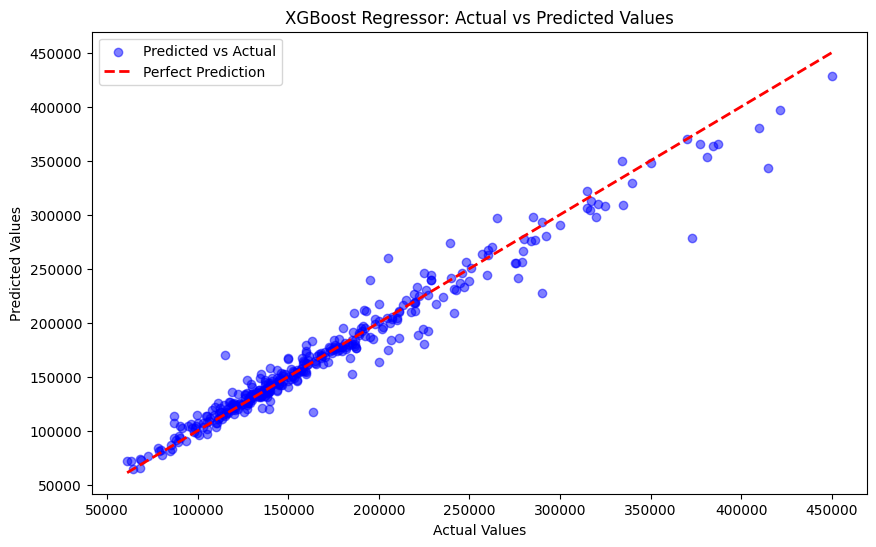

In [ ]:
# Scatter plot of actual vs predicted values for XGBoost without outliers
plt.figure(figsize=(10, 6))

# Scatter plot for predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')

# Plot a diagonal line where predicted = actual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels, title, and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor: Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

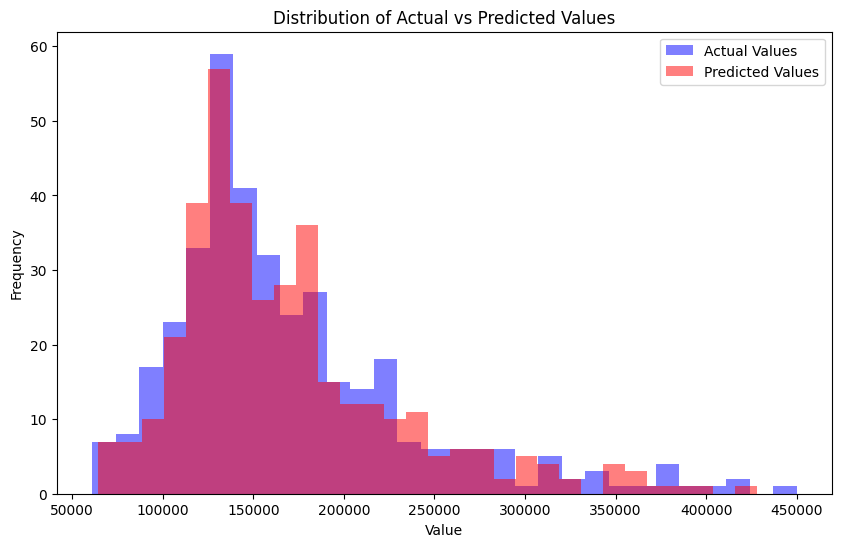

In [ ]:
# Plot histograms for the distribution of actual vs predicted values
plt.figure(figsize=(10, 6))

# Histogram for actual values
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Values', color='blue')

# Histogram for predicted values
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Values', color='red')

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

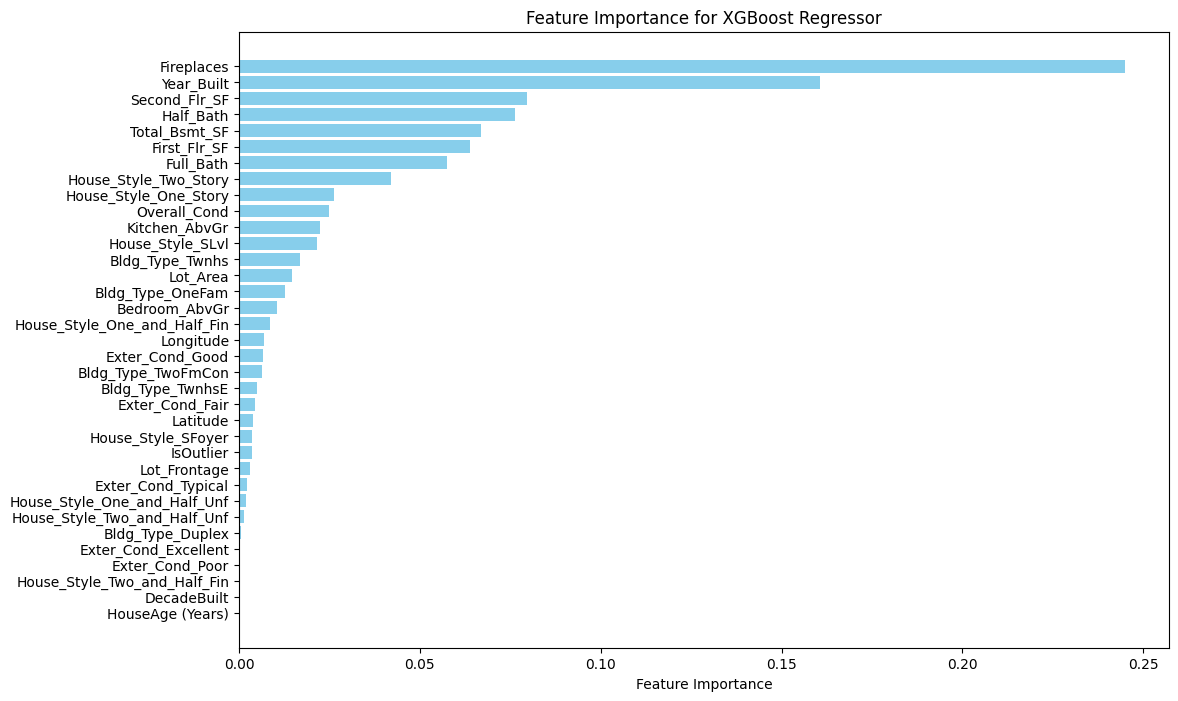

In [ ]:
# Get feature importances from the trained XGBoost model
importances = xgb_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort the feature importances in ascending order
sorted_idx = np.argsort(importances)

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XGBoost Regressor')

# Show the plot
plt.show()

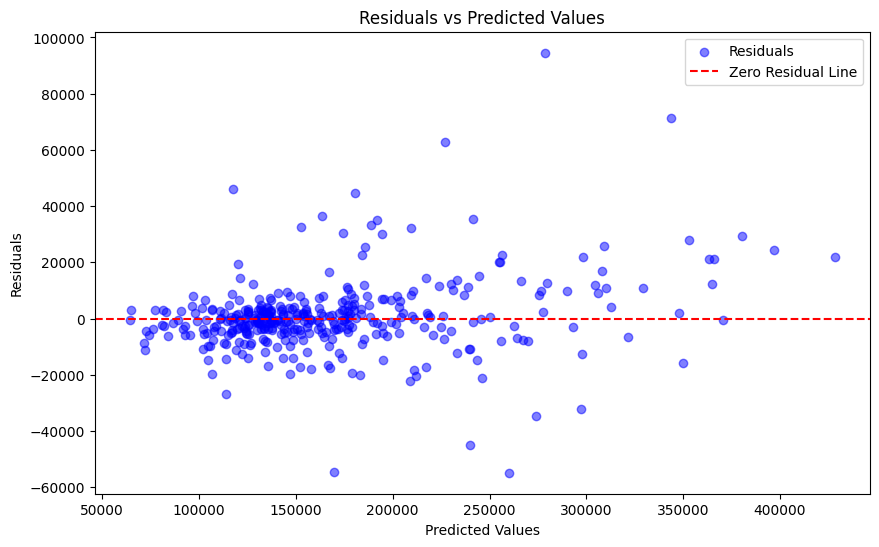

In [ ]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5, label='Residuals')

# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')

# Add labels, title, and legend
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

#### __CONCLUSION__

Summarily, the XGBoost Regressor emerged as the best performer in our analysis, particularly when trained on the dataset without outliers. This model demonstrated significantly lower errors, as indicated by the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), and exhibited superior explanatory power with a higher R-squared (R²) value.

The impact of outliers on model performance was substantial. Generally, removing outliers led to improved performance across all models. However, the most notable enhancement was observed in the XGBoost model, highlighting its sensitivity to outliers and its ability to benefit greatly from their removal.

In terms of model robustness, both the Random Forest and XGBoost models showed greater resilience to outliers compared to Linear Regression. Despite this, all models experienced performance gains when outliers were removed, underscoring the importance of outlier management in achieving accurate predictions.